`Importing the required libraries`


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
from scipy.optimize import linear_sum_assignment
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


`Data Ingestion`


Flats_data


In [2]:
flats_df = pd.read_csv("flats.csv")
flats_df.head()

FloorNo  FlatNo Typology  NoOfParkings  Time_To_Podium_1  Time_To_Podium_2  \
0       14  C-1404     3BHK             2                26                24   
1       14  C-1405     3BHK             2                26                24   
2       14  C-1406     3BHK             2                26                24   
3       14  C-1407     3BHK             2                26                24   
4       14  C-1403     4BHK             3                26                24   

   Time_To_Podium_3  Time_To_Podium_4  Time_To_Podium_5  Time_To_Podium_6  \
0                22                20                18                16   
1                22                20                18                16   
2                22                20                18                16   
3                22                20                18                16   
4                22                20                18                16   

   Time_To_Podium_7  Time_To_Podium_8  Time_To_Podium_9  
0                14                12                10  
1                14                12                10  
2                14                12                10  
3                14                12                10  
4                14                12                10

In [3]:
flats_df.shape

(348, 13)

In [4]:
flats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FloorNo           348 non-null    int64 
 1   FlatNo            348 non-null    object
 2   Typology          348 non-null    object
 3   NoOfParkings      348 non-null    int64 
 4   Time_To_Podium_1  348 non-null    int64 
 5   Time_To_Podium_2  348 non-null    int64 
 6   Time_To_Podium_3  348 non-null    int64 
 7   Time_To_Podium_4  348 non-null    int64 
 8   Time_To_Podium_5  348 non-null    int64 
 9   Time_To_Podium_6  348 non-null    int64 
 10  Time_To_Podium_7  348 non-null    int64 
 11  Time_To_Podium_8  348 non-null    int64 
 12  Time_To_Podium_9  348 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 35.5+ KB


In [5]:
flats_df['NoOfParkings'].sum()

793

In [6]:
list_of_columns_flats = []
for col in flats_df.columns:
    list_of_columns_flats.append(col)
    
list_of_columns_flats

['FloorNo',
 'FlatNo',
 'Typology',
 'NoOfParkings',
 'Time_To_Podium_1',
 'Time_To_Podium_2',
 'Time_To_Podium_3',
 'Time_To_Podium_4',
 'Time_To_Podium_5',
 'Time_To_Podium_6',
 'Time_To_Podium_7',
 'Time_To_Podium_8',
 'Time_To_Podium_9']

In [7]:
# Repeating each row according to the required NoofParking for that flats_df
flats_df_1 = pd.DataFrame(flats_df).values.repeat(flats_df['NoOfParkings'].astype(int),axis=0)
flats_df_1 = pd.DataFrame(flats_df_1,columns=list_of_columns_flats)
flats_df_1.head()

FloorNo  FlatNo Typology NoOfParkings Time_To_Podium_1 Time_To_Podium_2  \
0      14  C-1404     3BHK            2               26               24   
1      14  C-1404     3BHK            2               26               24   
2      14  C-1405     3BHK            2               26               24   
3      14  C-1405     3BHK            2               26               24   
4      14  C-1406     3BHK            2               26               24   

  Time_To_Podium_3 Time_To_Podium_4 Time_To_Podium_5 Time_To_Podium_6  \
0               22               20               18               16   
1               22               20               18               16   
2               22               20               18               16   
3               22               20               18               16   
4               22               20               18               16   

  Time_To_Podium_7 Time_To_Podium_8 Time_To_Podium_9  
0               14               12               10  
1               14               12               10  
2               14               12               10  
3               14               12               10  
4               14               12               10

In [8]:
flats_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FloorNo           793 non-null    object
 1   FlatNo            793 non-null    object
 2   Typology          793 non-null    object
 3   NoOfParkings      793 non-null    object
 4   Time_To_Podium_1  793 non-null    object
 5   Time_To_Podium_2  793 non-null    object
 6   Time_To_Podium_3  793 non-null    object
 7   Time_To_Podium_4  793 non-null    object
 8   Time_To_Podium_5  793 non-null    object
 9   Time_To_Podium_6  793 non-null    object
 10  Time_To_Podium_7  793 non-null    object
 11  Time_To_Podium_8  793 non-null    object
 12  Time_To_Podium_9  793 non-null    object
dtypes: object(13)
memory usage: 80.7+ KB


In [9]:
flats_df_1.shape

(793, 13)

In [10]:
# Create a new column 'Rank' based on the count of each value in 'Column1'
flats_df_1['Rank'] = flats_df_1.groupby('FlatNo').cumcount() + 1

# Display the DataFrame
flats_df_1.head()


FloorNo  FlatNo Typology NoOfParkings Time_To_Podium_1 Time_To_Podium_2  \
0      14  C-1404     3BHK            2               26               24   
1      14  C-1404     3BHK            2               26               24   
2      14  C-1405     3BHK            2               26               24   
3      14  C-1405     3BHK            2               26               24   
4      14  C-1406     3BHK            2               26               24   

  Time_To_Podium_3 Time_To_Podium_4 Time_To_Podium_5 Time_To_Podium_6  \
0               22               20               18               16   
1               22               20               18               16   
2               22               20               18               16   
3               22               20               18               16   
4               22               20               18               16   

  Time_To_Podium_7 Time_To_Podium_8 Time_To_Podium_9  Rank  
0               14               12               10     1  
1               14               12               10     2  
2               14               12               10     1  
3               14               12               10     2  
4               14               12               10     1

In [11]:
# Create unique flat numbers

flats_df_1['Unique_flat_No'] = flats_df_1['Rank'].astype(str) + "-" + flats_df_1['FlatNo']
flats_df_1.head() 


FloorNo  FlatNo Typology NoOfParkings Time_To_Podium_1 Time_To_Podium_2  \
0      14  C-1404     3BHK            2               26               24   
1      14  C-1404     3BHK            2               26               24   
2      14  C-1405     3BHK            2               26               24   
3      14  C-1405     3BHK            2               26               24   
4      14  C-1406     3BHK            2               26               24   

  Time_To_Podium_3 Time_To_Podium_4 Time_To_Podium_5 Time_To_Podium_6  \
0               22               20               18               16   
1               22               20               18               16   
2               22               20               18               16   
3               22               20               18               16   
4               22               20               18               16   

  Time_To_Podium_7 Time_To_Podium_8 Time_To_Podium_9  Rank Unique_flat_No  
0               14               12               10     1       1-C-1404  
1               14               12               10     2       2-C-1404  
2               14               12               10     1       1-C-1405  
3               14               12               10     2       2-C-1405  
4               14               12               10     1       1-C-1406

In [12]:
flats_df_1 = flats_df_1.drop(columns=['FloorNo','FlatNo','Typology','NoOfParkings'])
flats_df_1.head()

Time_To_Podium_1 Time_To_Podium_2 Time_To_Podium_3 Time_To_Podium_4  \
0               26               24               22               20   
1               26               24               22               20   
2               26               24               22               20   
3               26               24               22               20   
4               26               24               22               20   

  Time_To_Podium_5 Time_To_Podium_6 Time_To_Podium_7 Time_To_Podium_8  \
0               18               16               14               12   
1               18               16               14               12   
2               18               16               14               12   
3               18               16               14               12   
4               18               16               14               12   

  Time_To_Podium_9  Rank Unique_flat_No  
0               10     1       1-C-1404  
1               10     2       2-C-1404  
2               10     1       1-C-1405  
3               10     2       2-C-1405  
4               10     1       1-C-1406

In [13]:
columns_to_modify = [] 

for i in flats_df_1.columns[:-2]:
    columns_to_modify.append(i)
    
print(columns_to_modify) 
            


['Time_To_Podium_1', 'Time_To_Podium_2', 'Time_To_Podium_3', 'Time_To_Podium_4', 'Time_To_Podium_5', 'Time_To_Podium_6', 'Time_To_Podium_7', 'Time_To_Podium_8', 'Time_To_Podium_9']


In [14]:
# We need to create a function which will add the time based of number of parking
# if 1st parking then add 10 orelse 2nd parking then 20 sec orelse 3 then add 30 sec and so on


#time_to_add = 10
#for col in columns_to_modify:
#    flats_df_1[col] = flats_df_1[col].astype(int) + flats_df_1['Rank'] * time_to_add  

#flats_df_1.head()

In [15]:
#flats_df_1.to_csv("flats_v1.csv",index=False)

Parkings


In [16]:
parkings_df = pd.read_csv('parking_Data.csv')
parkings_df.head()

Podium Parking Slot  TravelTimeToLobby  TravelTimeToExitGate
0  Podium 2   Podium 2-1                 30                   240
1  Podium 2   Podium 2-2                 45                   240
2  Podium 2   Podium 2-3                 60                   240
3  Podium 2   Podium 2-4                 75                   240
4  Podium 2   Podium 2-5                 90                   240

In [17]:
parkings_df['TotalTime'] = parkings_df['TravelTimeToLobby'] + parkings_df['TravelTimeToExitGate']
parkings_df.head()

Podium Parking Slot  TravelTimeToLobby  TravelTimeToExitGate  TotalTime
0  Podium 2   Podium 2-1                 30                   240        270
1  Podium 2   Podium 2-2                 45                   240        285
2  Podium 2   Podium 2-3                 60                   240        300
3  Podium 2   Podium 2-4                 75                   240        315
4  Podium 2   Podium 2-5                 90                   240        330

In [18]:
parkings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Podium                801 non-null    object
 1   Parking Slot          801 non-null    object
 2   TravelTimeToLobby     801 non-null    int64 
 3   TravelTimeToExitGate  801 non-null    int64 
 4   TotalTime             801 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 31.4+ KB


In [19]:
parkings_df = parkings_df.drop(columns=['Podium','TravelTimeToLobby','TravelTimeToExitGate'])
parkings_df.head()

Parking Slot  TotalTime
0   Podium 2-1        270
1   Podium 2-2        285
2   Podium 2-3        300
3   Podium 2-4        315
4   Podium 2-5        330

In [20]:
# Transposing the dataframe to convert into matrix
parking_trasposed_df = pd.DataFrame(parkings_df.transpose()).reset_index()
parking_trasposed_df.columns = parking_trasposed_df.iloc[0]


In [21]:

parking_trasposed_df

0  Parking Slot  Podium 2-1  Podium 2-2  Podium 2-3  Podium 2-4  Podium 2-5  \
0  Parking Slot  Podium 2-1  Podium 2-2  Podium 2-3  Podium 2-4  Podium 2-5   
1     TotalTime         270         285         300         315         330   

0  Podium 2-6  Podium 2-7  Podium 2-8  Podium 2-9  Podium 2-10  Podium 2-11  \
0  Podium 2-6  Podium 2-7  Podium 2-8  Podium 2-9  Podium 2-10  Podium 2-11   
1         345         360         375         390          405          410   

0  Podium 2-12  Podium 2-13  Podium 2-14  Podium 2-15  Podium 2-16  \
0  Podium 2-12  Podium 2-13  Podium 2-14  Podium 2-15  Podium 2-16   
1          425          440          455          470          485   

0  Podium 2-17  Podium 2-18  Podium 2-19  Podium 2-20  Podium 2-21  \
0  Podium 2-17  Podium 2-18  Podium 2-19  Podium 2-20  Podium 2-21   
1          500          515          530          545          550   

0  Podium 2-22  Podium 2-23  Podium 2-24  Podium 2-25  Podium 2-26  \
0  Podium 2-22  Podium 2-23  Podium 2-24  Podium 2-25  Podium 2-26   
1          565          580          595          610          625   

0  Podium 2-27  Podium 2-28  Podium 2-29  Podium 2-30  Podium 2-31  \
0  Podium 2-27  Podium 2-28  Podium 2-29  Podium 2-30  Podium 2-31   
1          640          655          670          685          690   

0  Podium 2-32  Podium 2-33  Podium 2-34  Podium 2-35  Podium 2-36  \
0  Podium 2-32  Podium 2-33  Podium 2-34  Podium 2-35  Podium 2-36   
1          705          720          735          750          765   

0  Podium 2-37  Podium 2-38  Podium 2-39  Podium 2-40  Podium 2-41  \
0  Podium 2-37  Podium 2-38  Podium 2-39  Podium 2-40  Podium 2-41   
1          780          795          810          825          830   

0  Podium 2-42  Podium 2-43  Podium 2-44  Podium 2-45  Podium 2-46  \
0  Podium 2-42  Podium 2-43  Podium 2-44  Podium 2-45  Podium 2-46   
1          845          860          875          890          905   

0  Podium 2-47  Podium 2-48  Podium 2-49  Podium 2-50  Podium 2-51  \
0  Podium 2-47  Podium 2-48  Podium 2-49  Podium 2-50  Podium 2-51   
1          920          935          950          965          990   

0  Podium 2-52  Podium 2-53  Podium 2-54  Podium 2-55  Podium 2-56  \
0  Podium 2-52  Podium 2-53  Podium 2-54  Podium 2-55  Podium 2-56   
1         1005         1020         1035         1050         1065   

0  Podium 2-57  Podium 2-58  Podium 2-59  Podium 2-60  Podium 2-61  \
0  Podium 2-57  Podium 2-58  Podium 2-59  Podium 2-60  Podium 2-61   
1         1080         1095         1110         1125         1150   

0  Podium 2-62  Podium 2-63  Podium 2-64  Podium 2-65  Podium 2-66  \
0  Podium 2-62  Podium 2-63  Podium 2-64  Podium 2-65  Podium 2-66   
1         1165         1180         1195         1210         1225   

0  Podium 2-67  Podium 2-68  Podium 2-69  Podium 2-70  Podium 2-71  \
0  Podium 2-67  Podium 2-68  Podium 2-69  Podium 2-70  Podium 2-71   
1         1240         1255         1270         1285         1310   

0  Podium 2-72  Podium 2-73  Podium 2-74  Podium 2-75  Podium 2-76  \
0  Podium 2-72  Podium 2-73  Podium 2-74  Podium 2-75  Podium 2-76   
1         1325         1340         1355         1370         1385   

0  Podium 2-77  Podium 2-78  Podium 2-79  Podium 2-80  Podium 2-81  \
0  Podium 2-77  Podium 2-78  Podium 2-79  Podium 2-80  Podium 2-81   
1         1400         1415         1430         1445         1470   

0  Podium 2-82  Podium 2-83  Podium 2-84  Podium 2-85  Podium 2-86  \
0  Podium 2-82  Podium 2-83  Podium 2-84  Podium 2-85  Podium 2-86   
1         1485         1500         1515         1530         1545   

0  Podium 2-87  Podium 2-88  Podium 2-89  Podium 4-1  Podium 4-2  Podium 4-3  \
0  Podium 2-87  Podium 2-88  Podium 2-89  Podium 4-1  Podium 4-2  Podium 4-3   
1         1560         1575         1590         390         405         420   

0  Podium 4-4  Podium 4-5  Podium 4-6  Podium 4-7  Podium 4-8  Podium 4-9  \
0  Podium 4-4  Podium 4-5  Podium 4-6  Po

In [22]:
#Dropping the first row, as it is now redundant
parking_trasposed_df = parking_trasposed_df.iloc[1:,:]
parking_trasposed_df

0 Parking Slot Podium 2-1 Podium 2-2 Podium 2-3 Podium 2-4 Podium 2-5  \
1    TotalTime        270        285        300        315        330   

0 Podium 2-6 Podium 2-7 Podium 2-8 Podium 2-9 Podium 2-10 Podium 2-11  \
1        345        360        375        390         405         410   

0 Podium 2-12 Podium 2-13 Podium 2-14 Podium 2-15 Podium 2-16 Podium 2-17  \
1         425         440         455         470         485         500   

0 Podium 2-18 Podium 2-19 Podium 2-20 Podium 2-21 Podium 2-22 Podium 2-23  \
1         515         530         545         550         565         580   

0 Podium 2-24 Podium 2-25 Podium 2-26 Podium 2-27 Podium 2-28 Podium 2-29  \
1         595         610         625         640         655         670   

0 Podium 2-30 Podium 2-31 Podium 2-32 Podium 2-33 Podium 2-34 Podium 2-35  \
1         685         690         705         720         735         750   

0 Podium 2-36 Podium 2-37 Podium 2-38 Podium 2-39 Podium 2-40 Podium 2-41  \
1         765         780         795         810         825         830   

0 Podium 2-42 Podium 2-43 Podium 2-44 Podium 2-45 Podium 2-46 Podium 2-47  \
1         845         860         875         890         905         920   

0 Podium 2-48 Podium 2-49 Podium 2-50 Podium 2-51 Podium 2-52 Podium 2-53  \
1         935         950         965         990        1005        1020   

0 Podium 2-54 Podium 2-55 Podium 2-56 Podium 2-57 Podium 2-58 Podium 2-59  \
1        1035        1050        1065        1080        1095        1110   

0 Podium 2-60 Podium 2-61 Podium 2-62 Podium 2-63 Podium 2-64 Podium 2-65  \
1        1125        1150        1165        1180        1195        1210   

0 Podium 2-66 Podium 2-67 Podium 2-68 Podium 2-69 Podium 2-70 Podium 2-71  \
1        1225        1240        1255        1270        1285        1310   

0 Podium 2-72 Podium 2-73 Podium 2-74 Podium 2-75 Podium 2-76 Podium 2-77  \
1        1325        1340        1355        1370        1385        1400   

0 Podium 2-78 Podium 2-79 Podium 2-80 Podium 2-81 Podium 2-82 Podium 2-83  \
1        1415        1430        1445        1470        1485        1500   

0 Podium 2-84 Podium 2-85 Podium 2-86 Podium 2-87 Podium 2-88 Podium 2-89  \
1        1515        1530        1545        1560        1575        1590   

0 Podium 4-1 Podium 4-2 Podium 4-3 Podium 4-4 Podium 4-5 Podium 4-6  \
1        390        405        420        435        450        465   

0 Podium 4-7 Podium 4-8 Podium 4-9 Podium 4-10 Podium 4-11 Podium 4-12  \
1        480        495        510         525         530         545   

0 Podium 4-13 Podium 4-14 Podium 4-15 Podium 4-16 Podium 4-17 Podium 4-18  \
1         560         575         590         605         620         635   

0 Podium 4-19 Podium 4-20 Podium 4-21 Podium 4-22 Podium 4-23 Podium 4-24  \
1         650         665         670         685         700         715   

0 Podium 4-25 Podium 4-26 Podium 4-27 Podium 4-28 Podium 4-29 Podium 4-30  \
1         730         745         760         775         790         805   

0 Podium 4-31 Podium 4-32 Podium 4-33 Podium 4-34 Podium 4-35 Podium 4-36  \
1         810         825         840         855         870         885   

0 Podium 4-37 Podium 4-38 Podium 4-39 Podium 4-40 Podium 4-41 Podium 4-42  \
1         900         915         930         945         950         965   

0 Podium 4-43 Podium 4-44 Podium 4-45 Podium 4-46 Podium 4-47 Podium 4-48  \
1         980         995        1010        1025        1040        1055   

0 Podium 4-49 Podium 4-50 Podium 4-51 Podium 4-52 Podium 4-53 Podium 4-54  \
1        1070        1085        1110        1125        1140        1155   

0 Podium 4-55 Podium 4-56 Podium 4-57 Podium 4-58 Podium 4-59 Podium 4-60  \
1        1170        1185        1200        1215        1230        1245   

0 Podium 4-61 Podium 4-62 Podium 4-63 Podium 4-64 Podium 4-65 Podium 4-66  \
1        1270        1285        1300        1315        1330        1345   

0 Po

In [23]:
parking_trasposed_df.shape

(1, 802)

Data Transformation


In [24]:
flats_df_1.shape

(793, 11)

In [25]:
parking_trasposed_df.shape

(1, 802)

In [26]:
flats_df_1['key'] = 1
flats_df_1.head()

Time_To_Podium_1 Time_To_Podium_2 Time_To_Podium_3 Time_To_Podium_4  \
0               26               24               22               20   
1               26               24               22               20   
2               26               24               22               20   
3               26               24               22               20   
4               26               24               22               20   

  Time_To_Podium_5 Time_To_Podium_6 Time_To_Podium_7 Time_To_Podium_8  \
0               18               16               14               12   
1               18               16               14               12   
2               18               16               14               12   
3               18               16               14               12   
4               18               16               14               12   

  Time_To_Podium_9  Rank Unique_flat_No  key  
0               10     1       1-C-1404    1  
1               10     2       2-C-1404    1  
2               10     1       1-C-1405    1  
3               10     2       2-C-1405    1  
4               10     1       1-C-1406    1

In [27]:
parking_trasposed_df.loc[:, 'key'] = 1
parking_trasposed_df

0 Parking Slot Podium 2-1 Podium 2-2 Podium 2-3 Podium 2-4 Podium 2-5  \
1    TotalTime        270        285        300        315        330   

0 Podium 2-6 Podium 2-7 Podium 2-8 Podium 2-9 Podium 2-10 Podium 2-11  \
1        345        360        375        390         405         410   

0 Podium 2-12 Podium 2-13 Podium 2-14 Podium 2-15 Podium 2-16 Podium 2-17  \
1         425         440         455         470         485         500   

0 Podium 2-18 Podium 2-19 Podium 2-20 Podium 2-21 Podium 2-22 Podium 2-23  \
1         515         530         545         550         565         580   

0 Podium 2-24 Podium 2-25 Podium 2-26 Podium 2-27 Podium 2-28 Podium 2-29  \
1         595         610         625         640         655         670   

0 Podium 2-30 Podium 2-31 Podium 2-32 Podium 2-33 Podium 2-34 Podium 2-35  \
1         685         690         705         720         735         750   

0 Podium 2-36 Podium 2-37 Podium 2-38 Podium 2-39 Podium 2-40 Podium 2-41  \
1         765         780         795         810         825         830   

0 Podium 2-42 Podium 2-43 Podium 2-44 Podium 2-45 Podium 2-46 Podium 2-47  \
1         845         860         875         890         905         920   

0 Podium 2-48 Podium 2-49 Podium 2-50 Podium 2-51 Podium 2-52 Podium 2-53  \
1         935         950         965         990        1005        1020   

0 Podium 2-54 Podium 2-55 Podium 2-56 Podium 2-57 Podium 2-58 Podium 2-59  \
1        1035        1050        1065        1080        1095        1110   

0 Podium 2-60 Podium 2-61 Podium 2-62 Podium 2-63 Podium 2-64 Podium 2-65  \
1        1125        1150        1165        1180        1195        1210   

0 Podium 2-66 Podium 2-67 Podium 2-68 Podium 2-69 Podium 2-70 Podium 2-71  \
1        1225        1240        1255        1270        1285        1310   

0 Podium 2-72 Podium 2-73 Podium 2-74 Podium 2-75 Podium 2-76 Podium 2-77  \
1        1325        1340        1355        1370        1385        1400   

0 Podium 2-78 Podium 2-79 Podium 2-80 Podium 2-81 Podium 2-82 Podium 2-83  \
1        1415        1430        1445        1470        1485        1500   

0 Podium 2-84 Podium 2-85 Podium 2-86 Podium 2-87 Podium 2-88 Podium 2-89  \
1        1515        1530        1545        1560        1575        1590   

0 Podium 4-1 Podium 4-2 Podium 4-3 Podium 4-4 Podium 4-5 Podium 4-6  \
1        390        405        420        435        450        465   

0 Podium 4-7 Podium 4-8 Podium 4-9 Podium 4-10 Podium 4-11 Podium 4-12  \
1        480        495        510         525         530         545   

0 Podium 4-13 Podium 4-14 Podium 4-15 Podium 4-16 Podium 4-17 Podium 4-18  \
1         560         575         590         605         620         635   

0 Podium 4-19 Podium 4-20 Podium 4-21 Podium 4-22 Podium 4-23 Podium 4-24  \
1         650         665         670         685         700         715   

0 Podium 4-25 Podium 4-26 Podium 4-27 Podium 4-28 Podium 4-29 Podium 4-30  \
1         730         745         760         775         790         805   

0 Podium 4-31 Podium 4-32 Podium 4-33 Podium 4-34 Podium 4-35 Podium 4-36  \
1         810         825         840         855         870         885   

0 Podium 4-37 Podium 4-38 Podium 4-39 Podium 4-40 Podium 4-41 Podium 4-42  \
1         900         915         930         945         950         965   

0 Podium 4-43 Podium 4-44 Podium 4-45 Podium 4-46 Podium 4-47 Podium 4-48  \
1         980         995        1010        1025        1040        1055   

0 Podium 4-49 Podium 4-50 Podium 4-51 Podium 4-52 Podium 4-53 Podium 4-54  \
1        1070        1085        1110        1125        1140        1155   

0 Podium 4-55 Podium 4-56 Podium 4-57 Podium 4-58 Podium 4-59 Podium 4-60  \
1        1170        1185        1200        1215        1230        1245   

0 Podium 4-61 Podium 4-62 Podium 4-63 Podium 4-64 Podium 4-65 Podium 4-66  \
1        1270        1285        1300        1315        1330        1345   

0 Po

In [28]:
final_df = pd.merge(flats_df_1,parking_trasposed_df, on='key',how='outer')
final_df.head()

Time_To_Podium_1 Time_To_Podium_2 Time_To_Podium_3 Time_To_Podium_4  \
0               26               24               22               20   
1               26               24               22               20   
2               26               24               22               20   
3               26               24               22               20   
4               26               24               22               20   

  Time_To_Podium_5 Time_To_Podium_6 Time_To_Podium_7 Time_To_Podium_8  \
0               18               16               14               12   
1               18               16               14               12   
2               18               16               14               12   
3               18               16               14               12   
4               18               16               14               12   

  Time_To_Podium_9  Rank Unique_flat_No  key Parking Slot Podium 2-1  \
0               10     1       1-C-1404    1    TotalTime        270   
1               10     2       2-C-1404    1    TotalTime        270   
2               10     1       1-C-1405    1    TotalTime        270   
3               10     2       2-C-1405    1    TotalTime        270   
4               10     1       1-C-1406    1    TotalTime        270   

  Podium 2-2 Podium 2-3 Podium 2-4 Podium 2-5 Podium 2-6 Podium 2-7  \
0        285        300        315        330        345        360   
1        285        300        315        330        345        360   
2        285        300        315        330        345        360   
3        285        300        315        330        345        360   
4        285        300        315        330        345        360   

  Podium 2-8 Podium 2-9 Podium 2-10 Podium 2-11 Podium 2-12 Podium 2-13  \
0        375        390         405         410         425         440   
1        375        390         405         410         425         440   
2        375        390         405         410         425         440   
3        375        390         405         410         425         440   
4        375        390         405         410         425         440   

  Podium 2-14 Podium 2-15 Podium 2-16 Podium 2-17 Podium 2-18 Podium 2-19  \
0         455         470         485         500         515         530   
1         455         470         485         500         515         530   
2         455         470         485         500         515         530   
3         455         470         485         500         515         530   
4         455         470         485         500         515         530   

  Podium 2-20 Podium 2-21 Podium 2-22 Podium 2-23 Podium 2-24 Podium 2-25  \
0         545         550         565         580         595         610   
1         545         550         565         580         595         610   
2         545         550         565         580         595         610   
3         545         550         565         580         595         610   
4         545         550         565         580         595         610   

  Podium 2-26 Podium 2-27 Podium 2-28 Podium 2-29 Podium 2-30 Podium 2-31  \
0         625         640         655         670         685         690   
1         625         640         655         670         685         690   
2         625         640         655         670         685         690   
3         625         640         655         670         685         690   
4         625         640         655         670         685         690   

  Podium 2-32 Podium 2-33 Podium 2-34 Podium 2-35 Podium 2-36 Podium 2-37  \
0         705         720         735         750         765         780   
1         705         720         735         750         765         780   
2         705         720         735         750         765         780   
3         705         720         735         750         765         780   
4         705         720         735  

In [29]:
final_df = final_df.drop(columns=['Parking Slot','key'])
final_df.head()


Time_To_Podium_1 Time_To_Podium_2 Time_To_Podium_3 Time_To_Podium_4  \
0               26               24               22               20   
1               26               24               22               20   
2               26               24               22               20   
3               26               24               22               20   
4               26               24               22               20   

  Time_To_Podium_5 Time_To_Podium_6 Time_To_Podium_7 Time_To_Podium_8  \
0               18               16               14               12   
1               18               16               14               12   
2               18               16               14               12   
3               18               16               14               12   
4               18               16               14               12   

  Time_To_Podium_9  Rank Unique_flat_No Podium 2-1 Podium 2-2 Podium 2-3  \
0               10     1       1-C-1404        270        285        300   
1               10     2       2-C-1404        270        285        300   
2               10     1       1-C-1405        270        285        300   
3               10     2       2-C-1405        270        285        300   
4               10     1       1-C-1406        270        285        300   

  Podium 2-4 Podium 2-5 Podium 2-6 Podium 2-7 Podium 2-8 Podium 2-9  \
0        315        330        345        360        375        390   
1        315        330        345        360        375        390   
2        315        330        345        360        375        390   
3        315        330        345        360        375        390   
4        315        330        345        360        375        390   

  Podium 2-10 Podium 2-11 Podium 2-12 Podium 2-13 Podium 2-14 Podium 2-15  \
0         405         410         425         440         455         470   
1         405         410         425         440         455         470   
2         405         410         425         440         455         470   
3         405         410         425         440         455         470   
4         405         410         425         440         455         470   

  Podium 2-16 Podium 2-17 Podium 2-18 Podium 2-19 Podium 2-20 Podium 2-21  \
0         485         500         515         530         545         550   
1         485         500         515         530         545         550   
2         485         500         515         530         545         550   
3         485         500         515         530         545         550   
4         485         500         515         530         545         550   

  Podium 2-22 Podium 2-23 Podium 2-24 Podium 2-25 Podium 2-26 Podium 2-27  \
0         565         580         595         610         625         640   
1         565         580         595         610         625         640   
2         565         580         595         610         625         640   
3         565         580         595         610         625         640   
4         565         580         595         610         625         640   

  Podium 2-28 Podium 2-29 Podium 2-30 Podium 2-31 Podium 2-32 Podium 2-33  \
0         655         670         685         690         705         720   
1         655         670         685         690         705         720   
2         655         670         685         690         705         720   
3         655         670         685         690         705         720   
4         655         670         685         690         705         720   

  Podium 2-34 Podium 2-35 Podium 2-36 Podium 2-37 Podium 2-38 Podium 2-39  \
0         735         750         765         780         795         810   
1         735         750         765         780         795         810   
2         735         750         765         780         795         810   
3         735         750         765         780         795         810   
4  

In [30]:
final_df.columns = final_df.columns.str.replace(' ','_')


In [31]:
final_df.head()

Time_To_Podium_1 Time_To_Podium_2 Time_To_Podium_3 Time_To_Podium_4  \
0               26               24               22               20   
1               26               24               22               20   
2               26               24               22               20   
3               26               24               22               20   
4               26               24               22               20   

  Time_To_Podium_5 Time_To_Podium_6 Time_To_Podium_7 Time_To_Podium_8  \
0               18               16               14               12   
1               18               16               14               12   
2               18               16               14               12   
3               18               16               14               12   
4               18               16               14               12   

  Time_To_Podium_9  Rank Unique_flat_No Podium_2-1 Podium_2-2 Podium_2-3  \
0               10     1       1-C-1404        270        285        300   
1               10     2       2-C-1404        270        285        300   
2               10     1       1-C-1405        270        285        300   
3               10     2       2-C-1405        270        285        300   
4               10     1       1-C-1406        270        285        300   

  Podium_2-4 Podium_2-5 Podium_2-6 Podium_2-7 Podium_2-8 Podium_2-9  \
0        315        330        345        360        375        390   
1        315        330        345        360        375        390   
2        315        330        345        360        375        390   
3        315        330        345        360        375        390   
4        315        330        345        360        375        390   

  Podium_2-10 Podium_2-11 Podium_2-12 Podium_2-13 Podium_2-14 Podium_2-15  \
0         405         410         425         440         455         470   
1         405         410         425         440         455         470   
2         405         410         425         440         455         470   
3         405         410         425         440         455         470   
4         405         410         425         440         455         470   

  Podium_2-16 Podium_2-17 Podium_2-18 Podium_2-19 Podium_2-20 Podium_2-21  \
0         485         500         515         530         545         550   
1         485         500         515         530         545         550   
2         485         500         515         530         545         550   
3         485         500         515         530         545         550   
4         485         500         515         530         545         550   

  Podium_2-22 Podium_2-23 Podium_2-24 Podium_2-25 Podium_2-26 Podium_2-27  \
0         565         580         595         610         625         640   
1         565         580         595         610         625         640   
2         565         580         595         610         625         640   
3         565         580         595         610         625         640   
4         565         580         595         610         625         640   

  Podium_2-28 Podium_2-29 Podium_2-30 Podium_2-31 Podium_2-32 Podium_2-33  \
0         655         670         685         690         705         720   
1         655         670         685         690         705         720   
2         655         670         685         690         705         720   
3         655         670         685         690         705         720   
4         655         670         685         690         705         720   

  Podium_2-34 Podium_2-35 Podium_2-36 Podium_2-37 Podium_2-38 Podium_2-39  \
0         735         750         765         780         795         810   
1         735         750         765         780         795         810   
2         735         750         765         780         795         810   
3         735         750         765         780         795         810   
4  

In [32]:
podium_time = final_df.iloc[:,:11]
podium_time.head()

Time_To_Podium_1 Time_To_Podium_2 Time_To_Podium_3 Time_To_Podium_4  \
0               26               24               22               20   
1               26               24               22               20   
2               26               24               22               20   
3               26               24               22               20   
4               26               24               22               20   

  Time_To_Podium_5 Time_To_Podium_6 Time_To_Podium_7 Time_To_Podium_8  \
0               18               16               14               12   
1               18               16               14               12   
2               18               16               14               12   
3               18               16               14               12   
4               18               16               14               12   

  Time_To_Podium_9  Rank Unique_flat_No  
0               10     1       1-C-1404  
1               10     2       2-C-1404  
2               10     1       1-C-1405  
3               10     2       2-C-1405  
4               10     1       1-C-1406

In [33]:
parking_time = final_df.iloc[:,9:]
parking_time.head()

Rank Unique_flat_No Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4 Podium_2-5  \
0     1       1-C-1404        270        285        300        315        330   
1     2       2-C-1404        270        285        300        315        330   
2     1       1-C-1405        270        285        300        315        330   
3     2       2-C-1405        270        285        300        315        330   
4     1       1-C-1406        270        285        300        315        330   

  Podium_2-6 Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10 Podium_2-11  \
0        345        360        375        390         405         410   
1        345        360        375        390         405         410   
2        345        360        375        390         405         410   
3        345        360        375        390         405         410   
4        345        360        375        390         405         410   

  Podium_2-12 Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16 Podium_2-17  \
0         425         440         455         470         485         500   
1         425         440         455         470         485         500   
2         425         440         455         470         485         500   
3         425         440         455         470         485         500   
4         425         440         455         470         485         500   

  Podium_2-18 Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22 Podium_2-23  \
0         515         530         545         550         565         580   
1         515         530         545         550         565         580   
2         515         530         545         550         565         580   
3         515         530         545         550         565         580   
4         515         530         545         550         565         580   

  Podium_2-24 Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28 Podium_2-29  \
0         595         610         625         640         655         670   
1         595         610         625         640         655         670   
2         595         610         625         640         655         670   
3         595         610         625         640         655         670   
4         595         610         625         640         655         670   

  Podium_2-30 Podium_2-31 Podium_2-32 Podium_2-33 Podium_2-34 Podium_2-35  \
0         685         690         705         720         735         750   
1         685         690         705         720         735         750   
2         685         690         705         720         735         750   
3         685         690         705         720         735         750   
4         685         690         705         720         735         750   

  Podium_2-36 Podium_2-37 Podium_2-38 Podium_2-39 Podium_2-40 Podium_2-41  \
0         765         780         795         810         825         830   
1         765         780         795         810         825         830   
2         765         780         795         810         825         830   
3         765         780         795         810         825         830   
4         765         780         795         810         825         830   

  Podium_2-42 Podium_2-43 Podium_2-44 Podium_2-45 Podium_2-46 Podium_2-47  \
0         845         860         875         890         905         920   
1         845         860         875         890         905         920   
2         845         860         875         890         905         920   
3         845         860         875         890         905         920   
4         845         860         875         890         905         920   

  Podium_2-48 Podium_2-49 Podium_2-50 Podium_2-51 Podium_2-52 Podium_2-53  \
0         935         950         965         990        1005        1020   
1         935         950         965         990        1005        1020   
2         935         950         965         990        1005       

In [34]:
for col in podium_time.columns:
    #print(col[-8:])
    for j in parking_time.columns:
        if col[-8:] == j[:8]:
            #print(col[-8:],j[:8],'Yes')
            parking_time[j] += podium_time[col] 
        else:
            pass

parking_time.head()
        

Rank Unique_flat_No Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4 Podium_2-5  \
0     2       1-C-1404        294        309        324        339        354   
1     4       2-C-1404        294        309        324        339        354   
2     2       1-C-1405        294        309        324        339        354   
3     4       2-C-1405        294        309        324        339        354   
4     2       1-C-1406        294        309        324        339        354   

  Podium_2-6 Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10 Podium_2-11  \
0        369        384        399        414         429         434   
1        369        384        399        414         429         434   
2        369        384        399        414         429         434   
3        369        384        399        414         429         434   
4        369        384        399        414         429         434   

  Podium_2-12 Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16 Podium_2-17  \
0         449         464         479         494         509         524   
1         449         464         479         494         509         524   
2         449         464         479         494         509         524   
3         449         464         479         494         509         524   
4         449         464         479         494         509         524   

  Podium_2-18 Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22 Podium_2-23  \
0         539         554         569         574         589         604   
1         539         554         569         574         589         604   
2         539         554         569         574         589         604   
3         539         554         569         574         589         604   
4         539         554         569         574         589         604   

  Podium_2-24 Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28 Podium_2-29  \
0         619         634         649         664         679         694   
1         619         634         649         664         679         694   
2         619         634         649         664         679         694   
3         619         634         649         664         679         694   
4         619         634         649         664         679         694   

  Podium_2-30 Podium_2-31 Podium_2-32 Podium_2-33 Podium_2-34 Podium_2-35  \
0         709         714         729         744         759         774   
1         709         714         729         744         759         774   
2         709         714         729         744         759         774   
3         709         714         729         744         759         774   
4         709         714         729         744         759         774   

  Podium_2-36 Podium_2-37 Podium_2-38 Podium_2-39 Podium_2-40 Podium_2-41  \
0         789         804         819         834         849         854   
1         789         804         819         834         849         854   
2         789         804         819         834         849         854   
3         789         804         819         834         849         854   
4         789         804         819         834         849         854   

  Podium_2-42 Podium_2-43 Podium_2-44 Podium_2-45 Podium_2-46 Podium_2-47  \
0         869         884         899         914         929         944   
1         869         884         899         914         929         944   
2         869         884         899         914         929         944   
3         869         884         899         914         929         944   
4         869         884         899         914         929         944   

  Podium_2-48 Podium_2-49 Podium_2-50 Podium_2-51 Podium_2-52 Podium_2-53  \
0         959         974         989        1014        1029        1044   
1         959         974         989        1014        1029        1044   
2         959         974         989        1014        1029       

In [35]:
parking_time['Rank'] = parking_time['Unique_flat_No'].str.split("-").str[0]
parking_time['Rank'].apply(pd.to_numeric,errors='coerce')
parking_time.head()


Rank Unique_flat_No Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4 Podium_2-5  \
0    1       1-C-1404        294        309        324        339        354   
1    2       2-C-1404        294        309        324        339        354   
2    1       1-C-1405        294        309        324        339        354   
3    2       2-C-1405        294        309        324        339        354   
4    1       1-C-1406        294        309        324        339        354   

  Podium_2-6 Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10 Podium_2-11  \
0        369        384        399        414         429         434   
1        369        384        399        414         429         434   
2        369        384        399        414         429         434   
3        369        384        399        414         429         434   
4        369        384        399        414         429         434   

  Podium_2-12 Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16 Podium_2-17  \
0         449         464         479         494         509         524   
1         449         464         479         494         509         524   
2         449         464         479         494         509         524   
3         449         464         479         494         509         524   
4         449         464         479         494         509         524   

  Podium_2-18 Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22 Podium_2-23  \
0         539         554         569         574         589         604   
1         539         554         569         574         589         604   
2         539         554         569         574         589         604   
3         539         554         569         574         589         604   
4         539         554         569         574         589         604   

  Podium_2-24 Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28 Podium_2-29  \
0         619         634         649         664         679         694   
1         619         634         649         664         679         694   
2         619         634         649         664         679         694   
3         619         634         649         664         679         694   
4         619         634         649         664         679         694   

  Podium_2-30 Podium_2-31 Podium_2-32 Podium_2-33 Podium_2-34 Podium_2-35  \
0         709         714         729         744         759         774   
1         709         714         729         744         759         774   
2         709         714         729         744         759         774   
3         709         714         729         744         759         774   
4         709         714         729         744         759         774   

  Podium_2-36 Podium_2-37 Podium_2-38 Podium_2-39 Podium_2-40 Podium_2-41  \
0         789         804         819         834         849         854   
1         789         804         819         834         849         854   
2         789         804         819         834         849         854   
3         789         804         819         834         849         854   
4         789         804         819         834         849         854   

  Podium_2-42 Podium_2-43 Podium_2-44 Podium_2-45 Podium_2-46 Podium_2-47  \
0         869         884         899         914         929         944   
1         869         884         899         914         929         944   
2         869         884         899         914         929         944   
3         869         884         899         914         929         944   
4         869         884         899         914         929         944   

  Podium_2-48 Podium_2-49 Podium_2-50 Podium_2-51 Podium_2-52 Podium_2-53  \
0         959         974         989        1014        1029        1044   
1         959         974         989        1014        1029        1044   
2         959         974         989        1014        1029        1044

# 1st Iteration


In [36]:
flats_data_1 = parking_time[parking_time['Rank'] == '1']
flats_data_1 = flats_data_1.iloc[:,1:2]
print(flats_data_1.shape)
flats_data_1.head()

(348, 1)


Unique_flat_No
0       1-C-1404
2       1-C-1405
4       1-C-1406
6       1-C-1407
8       1-C-1403

In [37]:
parking_time_matrix_1 = parking_time[parking_time['Rank'] == '1']

parking_time_matrix_1
    

Rank Unique_flat_No Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4  \
0      1       1-C-1404        294        309        324        339   
2      1       1-C-1405        294        309        324        339   
4      1       1-C-1406        294        309        324        339   
6      1       1-C-1407        294        309        324        339   
8      1       1-C-1403        294        309        324        339   
..   ...            ...        ...        ...        ...        ...   
781    1       1-C-6505        396        411        426        441   
783    1       1-C-6506        396        411        426        441   
785    1       1-C-6507        396        411        426        441   
787    1       1-C-6501        396        411        426        441   
790    1       1-C-6503        396        411        426        441   

    Podium_2-5 Podium_2-6 Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10  \
0          354        369        384        399        414         429   
2          354        369        384        399        414         429   
4          354        369        384        399        414         429   
6          354        369        384        399        414         429   
8          354        369        384        399        414         429   
..         ...        ...        ...        ...        ...         ...   
781        456        471        486        501        516         531   
783        456        471        486        501        516         531   
785        456        471        486        501        516         531   
787        456        471        486        501        516         531   
790        456        471        486        501        516         531   

    Podium_2-11 Podium_2-12 Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16  \
0           434         449         464         479         494         509   
2           434         449         464         479         494         509   
4           434         449         464         479         494         509   
6           434         449         464         479         494         509   
8           434         449         464         479         494         509   
..          ...         ...         ...         ...         ...         ...   
781         536         551         566         581         596         611   
783         536         551         566         581         596         611   
785         536         551         566         581         596         611   
787         536         551         566         581         596         611   
790         536         551         566         581         596         611   

    Podium_2-17 Podium_2-18 Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22  \
0           524         539         554         569         574         589   
2           524         539         554         569         574         589   
4           524         539         554         569         574         589   
6           524         539         554         569         574         589   
8           524         539         554         569         574         589   
..          ...         ...         ...         ...         ...         ...   
781         626         641         656         671         676         691   
783         626         641         656         671         676         691   
785         626         641         656         671         676         691   
787         626         641         656         671         676         691   
790         626         641         656         671         676         691   

    Podium_2-23 Podium_2-24 Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28  \
0           604         619         634         649         664         679   
2           604         619         634         649         664         679   
4           604         619         634         649         664         679   
6           604         619         634         

In [38]:
parking_time_matrix_1 = parking_time_matrix_1.iloc[:,2:]

parking_time_matrix_1

Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4 Podium_2-5 Podium_2-6  \
0          294        309        324        339        354        369   
2          294        309        324        339        354        369   
4          294        309        324        339        354        369   
6          294        309        324        339        354        369   
8          294        309        324        339        354        369   
..         ...        ...        ...        ...        ...        ...   
781        396        411        426        441        456        471   
783        396        411        426        441        456        471   
785        396        411        426        441        456        471   
787        396        411        426        441        456        471   
790        396        411        426        441        456        471   

    Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10 Podium_2-11 Podium_2-12  \
0          384        399        414         429         434         449   
2          384        399        414         429         434         449   
4          384        399        414         429         434         449   
6          384        399        414         429         434         449   
8          384        399        414         429         434         449   
..         ...        ...        ...         ...         ...         ...   
781        486        501        516         531         536         551   
783        486        501        516         531         536         551   
785        486        501        516         531         536         551   
787        486        501        516         531         536         551   
790        486        501        516         531         536         551   

    Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16 Podium_2-17 Podium_2-18  \
0           464         479         494         509         524         539   
2           464         479         494         509         524         539   
4           464         479         494         509         524         539   
6           464         479         494         509         524         539   
8           464         479         494         509         524         539   
..          ...         ...         ...         ...         ...         ...   
781         566         581         596         611         626         641   
783         566         581         596         611         626         641   
785         566         581         596         611         626         641   
787         566         581         596         611         626         641   
790         566         581         596         611         626         641   

    Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22 Podium_2-23 Podium_2-24  \
0           554         569         574         589         604         619   
2           554         569         574         589         604         619   
4           554         569         574         589         604         619   
6           554         569         574         589         604         619   
8           554         569         574         589         604         619   
..          ...         ...         ...         ...         ...         ...   
781         656         671         676         691         706         721   
783         656         671         676         691         706         721   
785         656         671         676         691         706         721   
787         656         671         676         691         706         721   
790         656         671         676         691         706         721   

    Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28 Podium_2-29 Podium_2-30  \
0           634         649         664         679         694         709   
2           634         649         664         679         694         709   
4           634         649         664         679         694         709   


In [39]:
print(parking_time_matrix_1.shape[1])
print(parking_time_matrix_1.shape[0])
parking_time_matrix_1.shape[1]-parking_time_matrix_1.shape[0]

801
348


453

In [40]:
zero_rows = pd.DataFrame(np.zeros((parking_time_matrix_1.shape[1]-parking_time_matrix_1.shape[0], parking_time_matrix_1.shape[1])), columns=parking_time_matrix_1.columns)
zero_rows.shape

(453, 801)

In [41]:
parking_time_matrix_df = pd.concat([parking_time_matrix_1,zero_rows],axis=0)
parking_time_matrix_df.shape

(801, 801)

In [42]:
parking_time_matrix_df.head()

Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4 Podium_2-5 Podium_2-6  \
0        294        309        324        339        354        369   
2        294        309        324        339        354        369   
4        294        309        324        339        354        369   
6        294        309        324        339        354        369   
8        294        309        324        339        354        369   

  Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10 Podium_2-11 Podium_2-12  \
0        384        399        414         429         434         449   
2        384        399        414         429         434         449   
4        384        399        414         429         434         449   
6        384        399        414         429         434         449   
8        384        399        414         429         434         449   

  Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16 Podium_2-17 Podium_2-18  \
0         464         479         494         509         524         539   
2         464         479         494         509         524         539   
4         464         479         494         509         524         539   
6         464         479         494         509         524         539   
8         464         479         494         509         524         539   

  Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22 Podium_2-23 Podium_2-24  \
0         554         569         574         589         604         619   
2         554         569         574         589         604         619   
4         554         569         574         589         604         619   
6         554         569         574         589         604         619   
8         554         569         574         589         604         619   

  Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28 Podium_2-29 Podium_2-30  \
0         634         649         664         679         694         709   
2         634         649         664         679         694         709   
4         634         649         664         679         694         709   
6         634         649         664         679         694         709   
8         634         649         664         679         694         709   

  Podium_2-31 Podium_2-32 Podium_2-33 Podium_2-34 Podium_2-35 Podium_2-36  \
0         714         729         744         759         774         789   
2         714         729         744         759         774         789   
4         714         729         744         759         774         789   
6         714         729         744         759         774         789   
8         714         729         744         759         774         789   

  Podium_2-37 Podium_2-38 Podium_2-39 Podium_2-40 Podium_2-41 Podium_2-42  \
0         804         819         834         849         854         869   
2         804         819         834         849         854         869   
4         804         819         834         849         854         869   
6         804         819         834         849         854         869   
8         804         819         834         849         854         869   

  Podium_2-43 Podium_2-44 Podium_2-45 Podium_2-46 Podium_2-47 Podium_2-48  \
0         884         899         914         929         944         959   
2         884         899         914         929         944         959   
4         884         899         914         929         944         959   
6         884         899         914         929         944         959   
8         884         899         914         929         944         959   

  Podium_2-49 Podium_2-50 Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54  \
0         974         989        1014        1029        1044        1059   
2         974         989        1014        1029        1044        1059   
4         974         989        1014        1029        1044        1059   
6         974         989        1014       

In [43]:
#parking_time_matrix = parking_time_matrix_df.iloc[:,2:]
parking_time_matrix = parking_time_matrix_df.apply(pd.to_numeric)
parking_time_matrix

Podium_2-1  Podium_2-2  Podium_2-3  Podium_2-4  Podium_2-5  Podium_2-6  \
0           294         309         324         339         354         369   
2           294         309         324         339         354         369   
4           294         309         324         339         354         369   
6           294         309         324         339         354         369   
8           294         309         324         339         354         369   
..          ...         ...         ...         ...         ...         ...   
448           0           0           0           0           0           0   
449           0           0           0           0           0           0   
450           0           0           0           0           0           0   
451           0           0           0           0           0           0   
452           0           0           0           0           0           0   

     Podium_2-7  Podium_2-8  Podium_2-9  Podium_2-10  Podium_2-11  \
0           384         399         414          429          434   
2           384         399         414          429          434   
4           384         399         414          429          434   
6           384         399         414          429          434   
8           384         399         414          429          434   
..          ...         ...         ...          ...          ...   
448           0           0           0            0            0   
449           0           0           0            0            0   
450           0           0           0            0            0   
451           0           0           0            0            0   
452           0           0           0            0            0   

     Podium_2-12  Podium_2-13  Podium_2-14  Podium_2-15  Podium_2-16  \
0            449          464          479          494          509   
2            449          464          479          494          509   
4            449          464          479          494          509   
6            449          464          479          494          509   
8            449          464          479          494          509   
..           ...          ...          ...          ...          ...   
448            0            0            0            0            0   
449            0            0            0            0            0   
450            0            0            0            0            0   
451            0            0            0            0            0   
452            0            0            0            0            0   

     Podium_2-17  Podium_2-18  Podium_2-19  Podium_2-20  Podium_2-21  \
0            524          539          554          569          574   
2            524          539          554          569          574   
4            524          539          554          569          574   
6            524          539          554          569          574   
8            524          539          554          569          574   
..           ...          ...          ...          ...          ...   
448            0            0            0            0            0   
449            0            0            0            0            0   
450            0            0            0            0            0   
451            0            0            0            0            0   
452            0            0            0            0            0   

     Podium_2-22  Podium_2-23  Podium_2-24  Podium_2-25  Podium_2-26  \
0            589          604          619          634          649   
2            589          604          619          634          649   
4            589          604          619          634          649   
6            589          604          619          634          649   
8            589          604          619          634          649   
..           ...          ...          ...          ...          

In [44]:
parking_matrix = parking_time_matrix.values
parking_matrix

array([[ 294,  309,  324, ..., 1990, 2005, 2020],
       [ 294,  309,  324, ..., 1990, 2005, 2020],
       [ 294,  309,  324, ..., 1990, 2005, 2020],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [45]:
row_ind, col_ind = linear_sum_assignment(parking_matrix)


In [46]:
flats_data_1.loc[0][0]

'1-C-1404'

In [47]:
result_df_1 = pd.DataFrame({
    'Row':row_ind,
    'Col':col_ind,
    'time': parking_matrix[row_ind,col_ind]
})

In [48]:
result_df_1 = result_df_1[result_df_1['time'] != 0]
#result_df.to_csv("result_df.csv",index=False)

In [49]:
result_df_1.head()

Row  Col  time
0    0  445   236
1    1  446   251
2    2  447   266
3    3  448   281
4    4    0   294

In [50]:
#for i in result_df_1['Row']:
#    print(flats_data_1.loc[i])

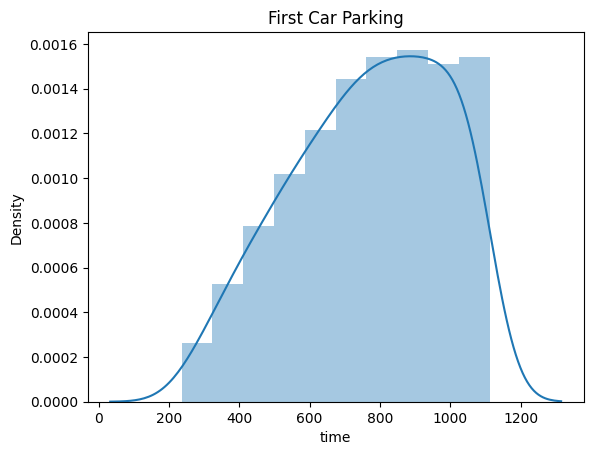

In [51]:
sns.distplot(result_df_1['time'])
plt.title("First Car Parking")
plt.show()

# Iteration 2


In [52]:
#Delete all the assign columns from the dataframe

parking_time.head()

Rank Unique_flat_No Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4 Podium_2-5  \
0    1       1-C-1404        294        309        324        339        354   
1    2       2-C-1404        294        309        324        339        354   
2    1       1-C-1405        294        309        324        339        354   
3    2       2-C-1405        294        309        324        339        354   
4    1       1-C-1406        294        309        324        339        354   

  Podium_2-6 Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10 Podium_2-11  \
0        369        384        399        414         429         434   
1        369        384        399        414         429         434   
2        369        384        399        414         429         434   
3        369        384        399        414         429         434   
4        369        384        399        414         429         434   

  Podium_2-12 Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16 Podium_2-17  \
0         449         464         479         494         509         524   
1         449         464         479         494         509         524   
2         449         464         479         494         509         524   
3         449         464         479         494         509         524   
4         449         464         479         494         509         524   

  Podium_2-18 Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22 Podium_2-23  \
0         539         554         569         574         589         604   
1         539         554         569         574         589         604   
2         539         554         569         574         589         604   
3         539         554         569         574         589         604   
4         539         554         569         574         589         604   

  Podium_2-24 Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28 Podium_2-29  \
0         619         634         649         664         679         694   
1         619         634         649         664         679         694   
2         619         634         649         664         679         694   
3         619         634         649         664         679         694   
4         619         634         649         664         679         694   

  Podium_2-30 Podium_2-31 Podium_2-32 Podium_2-33 Podium_2-34 Podium_2-35  \
0         709         714         729         744         759         774   
1         709         714         729         744         759         774   
2         709         714         729         744         759         774   
3         709         714         729         744         759         774   
4         709         714         729         744         759         774   

  Podium_2-36 Podium_2-37 Podium_2-38 Podium_2-39 Podium_2-40 Podium_2-41  \
0         789         804         819         834         849         854   
1         789         804         819         834         849         854   
2         789         804         819         834         849         854   
3         789         804         819         834         849         854   
4         789         804         819         834         849         854   

  Podium_2-42 Podium_2-43 Podium_2-44 Podium_2-45 Podium_2-46 Podium_2-47  \
0         869         884         899         914         929         944   
1         869         884         899         914         929         944   
2         869         884         899         914         929         944   
3         869         884         899         914         929         944   
4         869         884         899         914         929         944   

  Podium_2-48 Podium_2-49 Podium_2-50 Podium_2-51 Podium_2-52 Podium_2-53  \
0         959         974         989        1014        1029        1044   
1         959         974         989        1014        1029        1044   
2         959         974         989        1014        1029        1044

In [53]:
parking_time_2  = parking_time.iloc[:,2:]
parking_time_2.head()

Podium_2-1 Podium_2-2 Podium_2-3 Podium_2-4 Podium_2-5 Podium_2-6  \
0        294        309        324        339        354        369   
1        294        309        324        339        354        369   
2        294        309        324        339        354        369   
3        294        309        324        339        354        369   
4        294        309        324        339        354        369   

  Podium_2-7 Podium_2-8 Podium_2-9 Podium_2-10 Podium_2-11 Podium_2-12  \
0        384        399        414         429         434         449   
1        384        399        414         429         434         449   
2        384        399        414         429         434         449   
3        384        399        414         429         434         449   
4        384        399        414         429         434         449   

  Podium_2-13 Podium_2-14 Podium_2-15 Podium_2-16 Podium_2-17 Podium_2-18  \
0         464         479         494         509         524         539   
1         464         479         494         509         524         539   
2         464         479         494         509         524         539   
3         464         479         494         509         524         539   
4         464         479         494         509         524         539   

  Podium_2-19 Podium_2-20 Podium_2-21 Podium_2-22 Podium_2-23 Podium_2-24  \
0         554         569         574         589         604         619   
1         554         569         574         589         604         619   
2         554         569         574         589         604         619   
3         554         569         574         589         604         619   
4         554         569         574         589         604         619   

  Podium_2-25 Podium_2-26 Podium_2-27 Podium_2-28 Podium_2-29 Podium_2-30  \
0         634         649         664         679         694         709   
1         634         649         664         679         694         709   
2         634         649         664         679         694         709   
3         634         649         664         679         694         709   
4         634         649         664         679         694         709   

  Podium_2-31 Podium_2-32 Podium_2-33 Podium_2-34 Podium_2-35 Podium_2-36  \
0         714         729         744         759         774         789   
1         714         729         744         759         774         789   
2         714         729         744         759         774         789   
3         714         729         744         759         774         789   
4         714         729         744         759         774         789   

  Podium_2-37 Podium_2-38 Podium_2-39 Podium_2-40 Podium_2-41 Podium_2-42  \
0         804         819         834         849         854         869   
1         804         819         834         849         854         869   
2         804         819         834         849         854         869   
3         804         819         834         849         854         869   
4         804         819         834         849         854         869   

  Podium_2-43 Podium_2-44 Podium_2-45 Podium_2-46 Podium_2-47 Podium_2-48  \
0         884         899         914         929         944         959   
1         884         899         914         929         944         959   
2         884         899         914         929         944         959   
3         884         899         914         929         944         959   
4         884         899         914         929         944         959   

  Podium_2-49 Podium_2-50 Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54  \
0         974         989        1014        1029        1044        1059   
1         974         989        1014        1029        1044        1059   
2         974         989        1014        1029        1044        1059   
3         974         989        1014       

In [54]:
parking_time_2.shape

(793, 801)

In [55]:
cols_to_drop = result_df_1['Col'].values
len(cols_to_drop)

348

In [56]:
parking_time_2.shape

(793, 801)

In [57]:
parkings_df_copy = parkings_df.copy()
parkings_df_copy['Parking Slot'] = parkings_df_copy['Parking Slot'].str.replace(' ','_')
parkings_df_copy.head()

Parking Slot  TotalTime
0   Podium_2-1        270
1   Podium_2-2        285
2   Podium_2-3        300
3   Podium_2-4        315
4   Podium_2-5        330

In [58]:
# Example: Drop columns in parking_time_2 based on 'Col' values in result_df_1
cols_to_drop = result_df_1['Col'].values

# Filter out columns that exist in parking_time_2
cols_to_drop_existing = []
for col in cols_to_drop:
    cols_to_drop_existing.append(parkings_df_copy.loc[col][0])

#print(cols_to_drop_existing)

# Drop existing columns
parking_time_2 = parking_time_2.drop(cols_to_drop_existing, axis=1,errors='ignore')
#parking_time_2.shape


In [59]:
parking_time_2.shape

(793, 453)

In [60]:
parking_time_2.head()

Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54 Podium_2-55 Podium_2-56  \
0        1014        1029        1044        1059        1074        1089   
1        1014        1029        1044        1059        1074        1089   
2        1014        1029        1044        1059        1074        1089   
3        1014        1029        1044        1059        1074        1089   
4        1014        1029        1044        1059        1074        1089   

  Podium_2-57 Podium_2-58 Podium_2-59 Podium_2-60 Podium_2-61 Podium_2-62  \
0        1104        1119        1134        1149        1174        1189   
1        1104        1119        1134        1149        1174        1189   
2        1104        1119        1134        1149        1174        1189   
3        1104        1119        1134        1149        1174        1189   
4        1104        1119        1134        1149        1174        1189   

  Podium_2-63 Podium_2-64 Podium_2-65 Podium_2-66 Podium_2-67 Podium_2-68  \
0        1204        1219        1234        1249        1264        1279   
1        1204        1219        1234        1249        1264        1279   
2        1204        1219        1234        1249        1264        1279   
3        1204        1219        1234        1249        1264        1279   
4        1204        1219        1234        1249        1264        1279   

  Podium_2-69 Podium_2-70 Podium_2-71 Podium_2-72 Podium_2-73 Podium_2-74  \
0        1294        1309        1334        1349        1364        1379   
1        1294        1309        1334        1349        1364        1379   
2        1294        1309        1334        1349        1364        1379   
3        1294        1309        1334        1349        1364        1379   
4        1294        1309        1334        1349        1364        1379   

  Podium_2-75 Podium_2-76 Podium_2-77 Podium_2-78 Podium_2-79 Podium_2-80  \
0        1394        1409        1424        1439        1454        1469   
1        1394        1409        1424        1439        1454        1469   
2        1394        1409        1424        1439        1454        1469   
3        1394        1409        1424        1439        1454        1469   
4        1394        1409        1424        1439        1454        1469   

  Podium_2-81 Podium_2-82 Podium_2-83 Podium_2-84 Podium_2-85 Podium_2-86  \
0        1494        1509        1524        1539        1554        1569   
1        1494        1509        1524        1539        1554        1569   
2        1494        1509        1524        1539        1554        1569   
3        1494        1509        1524        1539        1554        1569   
4        1494        1509        1524        1539        1554        1569   

  Podium_2-87 Podium_2-88 Podium_2-89 Podium_4-44 Podium_4-45 Podium_4-46  \
0        1584        1599        1614        1015        1030        1045   
1        1584        1599        1614        1015        1030        1045   
2        1584        1599        1614        1015        1030        1045   
3        1584        1599        1614        1015        1030        1045   
4        1584        1599        1614        1015        1030        1045   

  Podium_4-47 Podium_4-48 Podium_4-49 Podium_4-50 Podium_4-51 Podium_4-52  \
0        1060        1075        1090        1105        1130        1145   
1        1060        1075        1090        1105        1130        1145   
2        1060        1075        1090        1105        1130        1145   
3        1060        1075        1090        1105        1130        1145   
4        1060        1075        1090        1105        1130        1145   

  Podium_4-53 Podium_4-54 Podium_4-55 Podium_4-56 Podium_4-57 Podium_4-58  \
0        1160        1175        1190        1205        1220        1235   
1        1160        1175        1190        1205        1220        1235   
2        1160        1175        1190        1205        1220      

In [61]:
parking_time_2_df = parking_time[parking_time['Rank'] == '2']
parking_time_2_df = parking_time_2_df.iloc[:,1:2]
print(parking_time_2_df.shape)
parking_time_2_df.head()

(348, 1)


Unique_flat_No
1       2-C-1404
3       2-C-1405
5       2-C-1406
7       2-C-1407
9       2-C-1403

In [62]:
parking_time_2_df['Key'] = 1
parking_time_2_df.head() 

Unique_flat_No  Key
1       2-C-1404    1
3       2-C-1405    1
5       2-C-1406    1
7       2-C-1407    1
9       2-C-1403    1

In [63]:
parking_time_2['Key'] = 1

In [64]:
print(parking_time_2.shape)
parking_time_2_new = parking_time_2.loc[:0]
print(parking_time_2_new.shape)
parking_time_2_new.head()


(793, 454)
(1, 454)


Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54 Podium_2-55 Podium_2-56  \
0        1014        1029        1044        1059        1074        1089   

  Podium_2-57 Podium_2-58 Podium_2-59 Podium_2-60 Podium_2-61 Podium_2-62  \
0        1104        1119        1134        1149        1174        1189   

  Podium_2-63 Podium_2-64 Podium_2-65 Podium_2-66 Podium_2-67 Podium_2-68  \
0        1204        1219        1234        1249        1264        1279   

  Podium_2-69 Podium_2-70 Podium_2-71 Podium_2-72 Podium_2-73 Podium_2-74  \
0        1294        1309        1334        1349        1364        1379   

  Podium_2-75 Podium_2-76 Podium_2-77 Podium_2-78 Podium_2-79 Podium_2-80  \
0        1394        1409        1424        1439        1454        1469   

  Podium_2-81 Podium_2-82 Podium_2-83 Podium_2-84 Podium_2-85 Podium_2-86  \
0        1494        1509        1524        1539        1554        1569   

  Podium_2-87 Podium_2-88 Podium_2-89 Podium_4-44 Podium_4-45 Podium_4-46  \
0        1584        1599        1614        1015        1030        1045   

  Podium_4-47 Podium_4-48 Podium_4-49 Podium_4-50 Podium_4-51 Podium_4-52  \
0        1060        1075        1090        1105        1130        1145   

  Podium_4-53 Podium_4-54 Podium_4-55 Podium_4-56 Podium_4-57 Podium_4-58  \
0        1160        1175        1190        1205        1220        1235   

  Podium_4-59 Podium_4-60 Podium_4-61 Podium_4-62 Podium_4-63 Podium_4-64  \
0        1250        1265        1290        1305        1320        1335   

  Podium_4-65 Podium_4-66 Podium_4-67 Podium_4-68 Podium_4-69 Podium_4-70  \
0        1350        1365        1380        1395        1410        1425   

  Podium_4-71 Podium_4-72 Podium_4-73 Podium_4-74 Podium_4-75 Podium_4-76  \
0        1450        1465        1480        1495        1510        1525   

  Podium_4-77 Podium_4-78 Podium_4-79 Podium_4-80 Podium_4-81 Podium_4-82  \
0        1540        1555        1570        1585        1610        1625   

  Podium_4-83 Podium_4-84 Podium_4-85 Podium_4-86 Podium_4-87 Podium_4-88  \
0        1640        1655        1670        1685        1700        1715   

  Podium_4-89 Podium_5-40 Podium_5-41 Podium_5-42 Podium_5-43 Podium_5-44  \
0        1730        1023        1028        1043        1058        1073   

  Podium_5-45 Podium_5-46 Podium_5-47 Podium_5-48 Podium_5-49 Podium_5-50  \
0        1088        1103        1118        1133        1148        1163   

  Podium_5-51 Podium_5-52 Podium_5-53 Podium_5-54 Podium_5-55 Podium_5-56  \
0        1188        1203        1218        1233        1248        1263   

  Podium_5-57 Podium_5-58 Podium_5-59 Podium_5-60 Podium_5-61 Podium_5-62  \
0        1278        1293        1308        1323        1348        1363   

  Podium_5-63 Podium_5-64 Podium_5-65 Podium_5-66 Podium_5-67 Podium_5-68  \
0        1378        1393        1408        1423        1438        1453   

  Podium_5-69 Podium_5-70 Podium_5-71 Podium_5-72 Podium_5-73 Podium_5-74  \
0        1468        1483        1508        1523        1538        1553   

  Podium_5-75 Podium_5-76 Podium_5-77 Podium_5-78 Podium_5-79 Podium_5-80  \
0        1568        1583        1598        1613        1628        1643   

  Podium_5-81 Podium_5-82 Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86  \
0        1668        1683        1698        1713        1728        1743   

  Podium_5-87 Podium_5-88 Podium_5-89 Podium_6-36 Podium_6-37 Podium_6-38  \
0        1758        1773        1788        1021        1036        1051   

  Podium_6-39 Podium_6-40 Podium_6-41 Podium_6-42 Podium_6-43 Podium_6-44  \
0        1066        1081        1086        1101        1116        1131   

  Podium_6-45 Podium_6-46 Podium_6-47 Podium_6-48 Podium_6-49 Podium_6-50  \
0        1146        1161        1176        1191        1206        1221   

  Podium_6-51 Podium_6-52 Podium_6-53 Podium_6-54 Podium_6-55 Podium_6-56  \
0        1246        1261        1276        1291 

In [65]:
final_df_iter_2 = pd.merge(parking_time_2_df,parking_time_2_new, on='Key',how='outer')
final_df_iter_2.head()

Unique_flat_No  Key Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54  \
0       2-C-1404    1        1014        1029        1044        1059   
1       2-C-1405    1        1014        1029        1044        1059   
2       2-C-1406    1        1014        1029        1044        1059   
3       2-C-1407    1        1014        1029        1044        1059   
4       2-C-1403    1        1014        1029        1044        1059   

  Podium_2-55 Podium_2-56 Podium_2-57 Podium_2-58 Podium_2-59 Podium_2-60  \
0        1074        1089        1104        1119        1134        1149   
1        1074        1089        1104        1119        1134        1149   
2        1074        1089        1104        1119        1134        1149   
3        1074        1089        1104        1119        1134        1149   
4        1074        1089        1104        1119        1134        1149   

  Podium_2-61 Podium_2-62 Podium_2-63 Podium_2-64 Podium_2-65 Podium_2-66  \
0        1174        1189        1204        1219        1234        1249   
1        1174        1189        1204        1219        1234        1249   
2        1174        1189        1204        1219        1234        1249   
3        1174        1189        1204        1219        1234        1249   
4        1174        1189        1204        1219        1234        1249   

  Podium_2-67 Podium_2-68 Podium_2-69 Podium_2-70 Podium_2-71 Podium_2-72  \
0        1264        1279        1294        1309        1334        1349   
1        1264        1279        1294        1309        1334        1349   
2        1264        1279        1294        1309        1334        1349   
3        1264        1279        1294        1309        1334        1349   
4        1264        1279        1294        1309        1334        1349   

  Podium_2-73 Podium_2-74 Podium_2-75 Podium_2-76 Podium_2-77 Podium_2-78  \
0        1364        1379        1394        1409        1424        1439   
1        1364        1379        1394        1409        1424        1439   
2        1364        1379        1394        1409        1424        1439   
3        1364        1379        1394        1409        1424        1439   
4        1364        1379        1394        1409        1424        1439   

  Podium_2-79 Podium_2-80 Podium_2-81 Podium_2-82 Podium_2-83 Podium_2-84  \
0        1454        1469        1494        1509        1524        1539   
1        1454        1469        1494        1509        1524        1539   
2        1454        1469        1494        1509        1524        1539   
3        1454        1469        1494        1509        1524        1539   
4        1454        1469        1494        1509        1524        1539   

  Podium_2-85 Podium_2-86 Podium_2-87 Podium_2-88 Podium_2-89 Podium_4-44  \
0        1554        1569        1584        1599        1614        1015   
1        1554        1569        1584        1599        1614        1015   
2        1554        1569        1584        1599        1614        1015   
3        1554        1569        1584        1599        1614        1015   
4        1554        1569        1584        1599        1614        1015   

  Podium_4-45 Podium_4-46 Podium_4-47 Podium_4-48 Podium_4-49 Podium_4-50  \
0        1030        1045        1060        1075        1090        1105   
1        1030        1045        1060        1075        1090        1105   
2        1030        1045        1060        1075        1090        1105   
3        1030        1045        1060        1075        1090        1105   
4        1030        1045        1060        1075        1090        1105   

  Podium_4-51 Podium_4-52 Podium_4-53 Podium_4-54 Podium_4-55 Podium_4-56  \
0        1130        1145        1160        1175        1190        1205   
1        1130        1145        1160        1175        1190        1205   
2        1130        1145        1160        1175        1190        1205   
3        1130 

In [66]:
final_df_iter_2 = final_df_iter_2.drop(columns='Key')

In [67]:
final_df_iter_2.shape

(348, 454)

In [68]:
parking_time_matrix_2 = final_df_iter_2.drop(columns='Unique_flat_No')
parking_time_matrix_2

Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54 Podium_2-55 Podium_2-56  \
0          1014        1029        1044        1059        1074        1089   
1          1014        1029        1044        1059        1074        1089   
2          1014        1029        1044        1059        1074        1089   
3          1014        1029        1044        1059        1074        1089   
4          1014        1029        1044        1059        1074        1089   
..          ...         ...         ...         ...         ...         ...   
343        1014        1029        1044        1059        1074        1089   
344        1014        1029        1044        1059        1074        1089   
345        1014        1029        1044        1059        1074        1089   
346        1014        1029        1044        1059        1074        1089   
347        1014        1029        1044        1059        1074        1089   

    Podium_2-57 Podium_2-58 Podium_2-59 Podium_2-60 Podium_2-61 Podium_2-62  \
0          1104        1119        1134        1149        1174        1189   
1          1104        1119        1134        1149        1174        1189   
2          1104        1119        1134        1149        1174        1189   
3          1104        1119        1134        1149        1174        1189   
4          1104        1119        1134        1149        1174        1189   
..          ...         ...         ...         ...         ...         ...   
343        1104        1119        1134        1149        1174        1189   
344        1104        1119        1134        1149        1174        1189   
345        1104        1119        1134        1149        1174        1189   
346        1104        1119        1134        1149        1174        1189   
347        1104        1119        1134        1149        1174        1189   

    Podium_2-63 Podium_2-64 Podium_2-65 Podium_2-66 Podium_2-67 Podium_2-68  \
0          1204        1219        1234        1249        1264        1279   
1          1204        1219        1234        1249        1264        1279   
2          1204        1219        1234        1249        1264        1279   
3          1204        1219        1234        1249        1264        1279   
4          1204        1219        1234        1249        1264        1279   
..          ...         ...         ...         ...         ...         ...   
343        1204        1219        1234        1249        1264        1279   
344        1204        1219        1234        1249        1264        1279   
345        1204        1219        1234        1249        1264        1279   
346        1204        1219        1234        1249        1264        1279   
347        1204        1219        1234        1249        1264        1279   

    Podium_2-69 Podium_2-70 Podium_2-71 Podium_2-72 Podium_2-73 Podium_2-74  \
0          1294        1309        1334        1349        1364        1379   
1          1294        1309        1334        1349        1364        1379   
2          1294        1309        1334        1349        1364        1379   
3          1294        1309        1334        1349        1364        1379   
4          1294        1309        1334        1349        1364        1379   
..          ...         ...         ...         ...         ...         ...   
343        1294        1309        1334        1349        1364        1379   
344        1294        1309        1334        1349        1364        1379   
345        1294        1309        1334        1349        1364        1379   
346        1294        1309        1334        1349        1364        1379   
347        1294        1309        1334        1349        1364        1379   

    Podium_2-75 Podium_2-76 Podium_2-77 Podium_2-78 Podium_2-79 Podium_2-80  \
0          1394        1409        1424        1439        1454        1469   
1          1394        1409        1424        143

In [69]:
print(parking_time_matrix_2.shape[1])
print(parking_time_matrix_2.shape[0])
parking_time_matrix_2.shape[1]-parking_time_matrix_2.shape[0]

453
348


105

In [70]:
zero_rows_2 = pd.DataFrame(np.zeros((parking_time_matrix_2.shape[1]-parking_time_matrix_2.shape[0], parking_time_matrix_2.shape[1])), columns=parking_time_matrix_2.columns)
zero_rows_2.shape

(105, 453)

In [71]:
parking_time_matrix_2_df = pd.concat([parking_time_matrix_2,zero_rows_2],axis=0)
parking_time_matrix_2_df.shape

(453, 453)

In [72]:
parking_time_matrix_2_df.head()

Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54 Podium_2-55 Podium_2-56  \
0        1014        1029        1044        1059        1074        1089   
1        1014        1029        1044        1059        1074        1089   
2        1014        1029        1044        1059        1074        1089   
3        1014        1029        1044        1059        1074        1089   
4        1014        1029        1044        1059        1074        1089   

  Podium_2-57 Podium_2-58 Podium_2-59 Podium_2-60 Podium_2-61 Podium_2-62  \
0        1104        1119        1134        1149        1174        1189   
1        1104        1119        1134        1149        1174        1189   
2        1104        1119        1134        1149        1174        1189   
3        1104        1119        1134        1149        1174        1189   
4        1104        1119        1134        1149        1174        1189   

  Podium_2-63 Podium_2-64 Podium_2-65 Podium_2-66 Podium_2-67 Podium_2-68  \
0        1204        1219        1234        1249        1264        1279   
1        1204        1219        1234        1249        1264        1279   
2        1204        1219        1234        1249        1264        1279   
3        1204        1219        1234        1249        1264        1279   
4        1204        1219        1234        1249        1264        1279   

  Podium_2-69 Podium_2-70 Podium_2-71 Podium_2-72 Podium_2-73 Podium_2-74  \
0        1294        1309        1334        1349        1364        1379   
1        1294        1309        1334        1349        1364        1379   
2        1294        1309        1334        1349        1364        1379   
3        1294        1309        1334        1349        1364        1379   
4        1294        1309        1334        1349        1364        1379   

  Podium_2-75 Podium_2-76 Podium_2-77 Podium_2-78 Podium_2-79 Podium_2-80  \
0        1394        1409        1424        1439        1454        1469   
1        1394        1409        1424        1439        1454        1469   
2        1394        1409        1424        1439        1454        1469   
3        1394        1409        1424        1439        1454        1469   
4        1394        1409        1424        1439        1454        1469   

  Podium_2-81 Podium_2-82 Podium_2-83 Podium_2-84 Podium_2-85 Podium_2-86  \
0        1494        1509        1524        1539        1554        1569   
1        1494        1509        1524        1539        1554        1569   
2        1494        1509        1524        1539        1554        1569   
3        1494        1509        1524        1539        1554        1569   
4        1494        1509        1524        1539        1554        1569   

  Podium_2-87 Podium_2-88 Podium_2-89 Podium_4-44 Podium_4-45 Podium_4-46  \
0        1584        1599        1614        1015        1030        1045   
1        1584        1599        1614        1015        1030        1045   
2        1584        1599        1614        1015        1030        1045   
3        1584        1599        1614        1015        1030        1045   
4        1584        1599        1614        1015        1030        1045   

  Podium_4-47 Podium_4-48 Podium_4-49 Podium_4-50 Podium_4-51 Podium_4-52  \
0        1060        1075        1090        1105        1130        1145   
1        1060        1075        1090        1105        1130        1145   
2        1060        1075        1090        1105        1130        1145   
3        1060        1075        1090        1105        1130        1145   
4        1060        1075        1090        1105        1130        1145   

  Podium_4-53 Podium_4-54 Podium_4-55 Podium_4-56 Podium_4-57 Podium_4-58  \
0        1160        1175        1190        1205        1220        1235   
1        1160        1175        1190        1205        1220        1235   
2        1160        1175        1190        1205        1220      

In [73]:
parking_time_matrix_2_df = parking_time_matrix_2_df.apply(pd.to_numeric)
parking_time_matrix_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 104
Columns: 453 entries, Podium_2-51 to Podium_9-89
dtypes: int64(453)
memory usage: 1.6 MB


In [74]:
parking_matrix_2 = parking_time_matrix_2_df.values
parking_matrix_2.shape

(453, 453)

In [75]:
parking_matrix_2

array([[1014, 1029, 1044, ..., 1990, 2005, 2020],
       [1014, 1029, 1044, ..., 1990, 2005, 2020],
       [1014, 1029, 1044, ..., 1990, 2005, 2020],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [76]:
row_ind_2, col_ind_2 = linear_sum_assignment(parking_matrix_2)

In [77]:
result_df_2 = pd.DataFrame({
    'Row_2':row_ind_2,
    'Col_2':col_ind_2,
    'time_2': parking_matrix_2[row_ind_2,col_ind_2]
})

result_df_2 = result_df_2[result_df_2['time_2'] != 0]


result_df_2

Row_2  Col_2  time_2
0        0    324    1012
1        1      0    1014
2        2     39    1015
3        3    247    1016
4        4    282    1017
..     ...    ...     ...
343    343    173    1611
344    344    319    1612
345    345    364    1612
346    346    123    1613
347    347     38    1614

[348 rows x 3 columns]

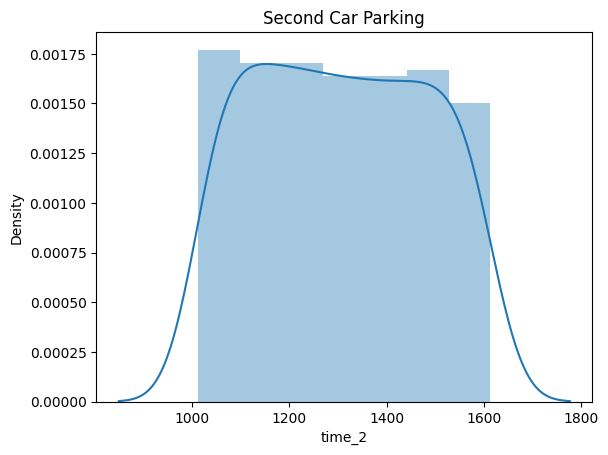

In [78]:
sns.distplot(result_df_2['time_2'])
plt.title("Second Car Parking")
plt.show()

<Axes: xlabel='time_2', ylabel='Density'>

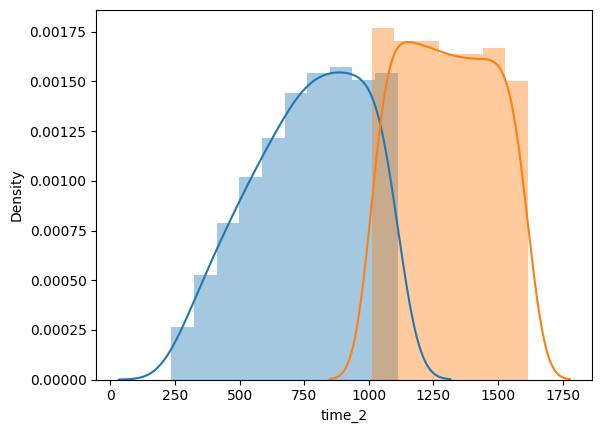

In [79]:
sns.distplot(result_df_1['time'])
sns.distplot(result_df_2['time_2'])

# Iteration 3


In [80]:
parking_time_2_new.head()
parking_time_2_new_1 = parking_time_2_new.drop(columns='Key')
parking_time_2_new_1

Podium_2-51 Podium_2-52 Podium_2-53 Podium_2-54 Podium_2-55 Podium_2-56  \
0        1014        1029        1044        1059        1074        1089   

  Podium_2-57 Podium_2-58 Podium_2-59 Podium_2-60 Podium_2-61 Podium_2-62  \
0        1104        1119        1134        1149        1174        1189   

  Podium_2-63 Podium_2-64 Podium_2-65 Podium_2-66 Podium_2-67 Podium_2-68  \
0        1204        1219        1234        1249        1264        1279   

  Podium_2-69 Podium_2-70 Podium_2-71 Podium_2-72 Podium_2-73 Podium_2-74  \
0        1294        1309        1334        1349        1364        1379   

  Podium_2-75 Podium_2-76 Podium_2-77 Podium_2-78 Podium_2-79 Podium_2-80  \
0        1394        1409        1424        1439        1454        1469   

  Podium_2-81 Podium_2-82 Podium_2-83 Podium_2-84 Podium_2-85 Podium_2-86  \
0        1494        1509        1524        1539        1554        1569   

  Podium_2-87 Podium_2-88 Podium_2-89 Podium_4-44 Podium_4-45 Podium_4-46  \
0        1584        1599        1614        1015        1030        1045   

  Podium_4-47 Podium_4-48 Podium_4-49 Podium_4-50 Podium_4-51 Podium_4-52  \
0        1060        1075        1090        1105        1130        1145   

  Podium_4-53 Podium_4-54 Podium_4-55 Podium_4-56 Podium_4-57 Podium_4-58  \
0        1160        1175        1190        1205        1220        1235   

  Podium_4-59 Podium_4-60 Podium_4-61 Podium_4-62 Podium_4-63 Podium_4-64  \
0        1250        1265        1290        1305        1320        1335   

  Podium_4-65 Podium_4-66 Podium_4-67 Podium_4-68 Podium_4-69 Podium_4-70  \
0        1350        1365        1380        1395        1410        1425   

  Podium_4-71 Podium_4-72 Podium_4-73 Podium_4-74 Podium_4-75 Podium_4-76  \
0        1450        1465        1480        1495        1510        1525   

  Podium_4-77 Podium_4-78 Podium_4-79 Podium_4-80 Podium_4-81 Podium_4-82  \
0        1540        1555        1570        1585        1610        1625   

  Podium_4-83 Podium_4-84 Podium_4-85 Podium_4-86 Podium_4-87 Podium_4-88  \
0        1640        1655        1670        1685        1700        1715   

  Podium_4-89 Podium_5-40 Podium_5-41 Podium_5-42 Podium_5-43 Podium_5-44  \
0        1730        1023        1028        1043        1058        1073   

  Podium_5-45 Podium_5-46 Podium_5-47 Podium_5-48 Podium_5-49 Podium_5-50  \
0        1088        1103        1118        1133        1148        1163   

  Podium_5-51 Podium_5-52 Podium_5-53 Podium_5-54 Podium_5-55 Podium_5-56  \
0        1188        1203        1218        1233        1248        1263   

  Podium_5-57 Podium_5-58 Podium_5-59 Podium_5-60 Podium_5-61 Podium_5-62  \
0        1278        1293        1308        1323        1348        1363   

  Podium_5-63 Podium_5-64 Podium_5-65 Podium_5-66 Podium_5-67 Podium_5-68  \
0        1378        1393        1408        1423        1438        1453   

  Podium_5-69 Podium_5-70 Podium_5-71 Podium_5-72 Podium_5-73 Podium_5-74  \
0        1468        1483        1508        1523        1538        1553   

  Podium_5-75 Podium_5-76 Podium_5-77 Podium_5-78 Podium_5-79 Podium_5-80  \
0        1568        1583        1598        1613        1628        1643   

  Podium_5-81 Podium_5-82 Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86  \
0        1668        1683        1698        1713        1728        1743   

  Podium_5-87 Podium_5-88 Podium_5-89 Podium_6-36 Podium_6-37 Podium_6-38  \
0        1758        1773        1788        1021        1036        1051   

  Podium_6-39 Podium_6-40 Podium_6-41 Podium_6-42 Podium_6-43 Podium_6-44  \
0        1066        1081        1086        1101        1116        1131   

  Podium_6-45 Podium_6-46 Podium_6-47 Podium_6-48 Podium_6-49 Podium_6-50  \
0        1146        1161        1176        1191        1206        1221   

  Podium_6-51 Podium_6-52 Podium_6-53 Podium_6-54 Podium_6-55 Podium_6-56  \
0        1246        1261        1276        1291 

In [81]:
parking_time_2_new_output = pd.DataFrame(parking_time_2_new_1.transpose()).reset_index()
parking_time_2_new_output = parking_time_2_new_output.iloc[:,:1]
parking_time_2_new_output

index
0    Podium_2-51
1    Podium_2-52
2    Podium_2-53
3    Podium_2-54
4    Podium_2-55
..           ...
448  Podium_9-85
449  Podium_9-86
450  Podium_9-87
451  Podium_9-88
452  Podium_9-89

[453 rows x 1 columns]

In [82]:
cols_to_drop_2 = result_df_2['Col_2'].values
len(cols_to_drop_2) 

348

In [83]:
# Example: Drop columns in parking_time_2 based on 'Col' values in result_df_2
cols_to_drop_2 = result_df_2['Col_2'].values

# Filter out columns that exist in parking_time_2
cols_to_drop_existing_2 = []
for col in cols_to_drop_2:
    cols_to_drop_existing_2.append(parking_time_2_new_output.loc[col][0])

print(cols_to_drop_existing)

# Drop existing columns
parking_time_3 = parking_time_2_new_1.drop(cols_to_drop_existing_2, axis=1,errors='ignore')
parking_time_3.shape


['Podium_1-1', 'Podium_1-2', 'Podium_1-3', 'Podium_1-4', 'Podium_2-1', 'Podium_1-5', 'Podium_2-2', 'Podium_1-6', 'Podium_2-3', 'Podium_1-7', 'Podium_2-4', 'Podium_1-8', 'Podium_3-1', 'Podium_2-5', 'Podium_1-9', 'Podium_3-2', 'Podium_2-6', 'Podium_1-10', 'Podium_1-11', 'Podium_3-3', 'Podium_2-7', 'Podium_1-12', 'Podium_3-4', 'Podium_2-8', 'Podium_1-13', 'Podium_4-1', 'Podium_3-5', 'Podium_2-9', 'Podium_1-14', 'Podium_4-2', 'Podium_3-6', 'Podium_2-10', 'Podium_2-11', 'Podium_1-15', 'Podium_4-3', 'Podium_3-7', 'Podium_2-12', 'Podium_1-16', 'Podium_4-4', 'Podium_3-8', 'Podium_2-13', 'Podium_1-17', 'Podium_5-1', 'Podium_4-5', 'Podium_3-9', 'Podium_2-14', 'Podium_1-18', 'Podium_5-2', 'Podium_4-6', 'Podium_3-10', 'Podium_3-11', 'Podium_2-15', 'Podium_1-19', 'Podium_5-3', 'Podium_4-7', 'Podium_3-12', 'Podium_2-16', 'Podium_1-20', 'Podium_5-4', 'Podium_4-8', 'Podium_1-21', 'Podium_3-13', 'Podium_2-17', 'Podium_6-1', 'Podium_5-5', 'Podium_4-9', 'Podium_1-22', 'Podium_3-14', 'Podium_2-18', 'Podiu

(1, 105)

In [84]:
parking_time_3.head()

Podium_4-82 Podium_4-83 Podium_4-84 Podium_4-85 Podium_4-86 Podium_4-87  \
0        1625        1640        1655        1670        1685        1700   

  Podium_4-88 Podium_4-89 Podium_5-79 Podium_5-80 Podium_5-81 Podium_5-82  \
0        1715        1730        1628        1643        1668        1683   

  Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86 Podium_5-87 Podium_5-88  \
0        1698        1713        1728        1743        1758        1773   

  Podium_5-89 Podium_6-75 Podium_6-76 Podium_6-77 Podium_6-78 Podium_6-79  \
0        1788        1626        1641        1656        1671        1686   

  Podium_6-80 Podium_6-81 Podium_6-82 Podium_6-83 Podium_6-84 Podium_6-85  \
0        1701        1726        1741        1756        1771        1786   

  Podium_6-86 Podium_6-87 Podium_6-88 Podium_6-89 Podium_7-71 Podium_7-72  \
0        1801        1816        1831        1846        1624        1639   

  Podium_7-73 Podium_7-74 Podium_7-75 Podium_7-76 Podium_7-77 Podium_7-78  \
0        1654        1669        1684        1699        1714        1729   

  Podium_7-79 Podium_7-80 Podium_7-81 Podium_7-82 Podium_7-83 Podium_7-84  \
0        1744        1759        1784        1799        1814        1829   

  Podium_7-85 Podium_7-86 Podium_7-87 Podium_7-88 Podium_7-89 Podium_3-86  \
0        1844        1859        1874        1889        1904        1627   

  Podium_3-87 Podium_3-88 Podium_3-89 Podium_8-68 Podium_8-69 Podium_8-70  \
0        1642        1657        1672        1627        1642        1657   

  Podium_8-71 Podium_8-72 Podium_8-73 Podium_8-74 Podium_8-75 Podium_8-76  \
0        1682        1697        1712        1727        1742        1757   

  Podium_8-77 Podium_8-78 Podium_8-79 Podium_8-80 Podium_8-81 Podium_8-82  \
0        1772        1787        1802        1817        1842        1857   

  Podium_8-83 Podium_8-84 Podium_8-85 Podium_8-86 Podium_8-87 Podium_8-88  \
0        1872        1887        1902        1917        1932        1947   

  Podium_8-89 Podium_9-64 Podium_9-65 Podium_9-66 Podium_9-67 Podium_9-68  \
0        1962        1625        1640        1655        1670        1685   

  Podium_9-69 Podium_9-70 Podium_9-71 Podium_9-72 Podium_9-73 Podium_9-74  \
0        1700        1715        1740        1755        1770        1785   

  Podium_9-75 Podium_9-76 Podium_9-77 Podium_9-78 Podium_9-79 Podium_9-80  \
0        1800        1815        1830        1845        1860        1875   

  Podium_9-81 Podium_9-82 Podium_9-83 Podium_9-84 Podium_9-85 Podium_9-86  \
0        1900        1915        1930        1945        1960        1975   

  Podium_9-87 Podium_9-88 Podium_9-89  
0        1990        2005        2020

In [85]:
parking_time_3_df = parking_time[parking_time['Rank'] == '3']
parking_time_3_df = parking_time_3_df.iloc[:,1:2]
print(parking_time_3_df.shape)
parking_time_3_df.head()

(97, 1)


Unique_flat_No
10       3-C-1403
23       3-C-1501
26       3-C-1503
39       3-C-1601
42       3-C-1603

In [86]:
parking_time_3_df['Key'] = 1
parking_time_3_df.head()

Unique_flat_No  Key
10       3-C-1403    1
23       3-C-1501    1
26       3-C-1503    1
39       3-C-1601    1
42       3-C-1603    1

In [87]:
parking_time_3['Key'] = 1
print(parking_time_3.shape)
parking_time_3.head()

(1, 106)


Podium_4-82 Podium_4-83 Podium_4-84 Podium_4-85 Podium_4-86 Podium_4-87  \
0        1625        1640        1655        1670        1685        1700   

  Podium_4-88 Podium_4-89 Podium_5-79 Podium_5-80 Podium_5-81 Podium_5-82  \
0        1715        1730        1628        1643        1668        1683   

  Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86 Podium_5-87 Podium_5-88  \
0        1698        1713        1728        1743        1758        1773   

  Podium_5-89 Podium_6-75 Podium_6-76 Podium_6-77 Podium_6-78 Podium_6-79  \
0        1788        1626        1641        1656        1671        1686   

  Podium_6-80 Podium_6-81 Podium_6-82 Podium_6-83 Podium_6-84 Podium_6-85  \
0        1701        1726        1741        1756        1771        1786   

  Podium_6-86 Podium_6-87 Podium_6-88 Podium_6-89 Podium_7-71 Podium_7-72  \
0        1801        1816        1831        1846        1624        1639   

  Podium_7-73 Podium_7-74 Podium_7-75 Podium_7-76 Podium_7-77 Podium_7-78  \
0        1654        1669        1684        1699        1714        1729   

  Podium_7-79 Podium_7-80 Podium_7-81 Podium_7-82 Podium_7-83 Podium_7-84  \
0        1744        1759        1784        1799        1814        1829   

  Podium_7-85 Podium_7-86 Podium_7-87 Podium_7-88 Podium_7-89 Podium_3-86  \
0        1844        1859        1874        1889        1904        1627   

  Podium_3-87 Podium_3-88 Podium_3-89 Podium_8-68 Podium_8-69 Podium_8-70  \
0        1642        1657        1672        1627        1642        1657   

  Podium_8-71 Podium_8-72 Podium_8-73 Podium_8-74 Podium_8-75 Podium_8-76  \
0        1682        1697        1712        1727        1742        1757   

  Podium_8-77 Podium_8-78 Podium_8-79 Podium_8-80 Podium_8-81 Podium_8-82  \
0        1772        1787        1802        1817        1842        1857   

  Podium_8-83 Podium_8-84 Podium_8-85 Podium_8-86 Podium_8-87 Podium_8-88  \
0        1872        1887        1902        1917        1932        1947   

  Podium_8-89 Podium_9-64 Podium_9-65 Podium_9-66 Podium_9-67 Podium_9-68  \
0        1962        1625        1640        1655        1670        1685   

  Podium_9-69 Podium_9-70 Podium_9-71 Podium_9-72 Podium_9-73 Podium_9-74  \
0        1700        1715        1740        1755        1770        1785   

  Podium_9-75 Podium_9-76 Podium_9-77 Podium_9-78 Podium_9-79 Podium_9-80  \
0        1800        1815        1830        1845        1860        1875   

  Podium_9-81 Podium_9-82 Podium_9-83 Podium_9-84 Podium_9-85 Podium_9-86  \
0        1900        1915        1930        1945        1960        1975   

  Podium_9-87 Podium_9-88 Podium_9-89  Key  
0        1990        2005        2020    1

In [88]:
final_df_iter_3 = pd.merge(parking_time_3_df,parking_time_3, on='Key',how='outer')
final_df_iter_3.head()

Unique_flat_No  Key Podium_4-82 Podium_4-83 Podium_4-84 Podium_4-85  \
0       3-C-1403    1        1625        1640        1655        1670   
1       3-C-1501    1        1625        1640        1655        1670   
2       3-C-1503    1        1625        1640        1655        1670   
3       3-C-1601    1        1625        1640        1655        1670   
4       3-C-1603    1        1625        1640        1655        1670   

  Podium_4-86 Podium_4-87 Podium_4-88 Podium_4-89 Podium_5-79 Podium_5-80  \
0        1685        1700        1715        1730        1628        1643   
1        1685        1700        1715        1730        1628        1643   
2        1685        1700        1715        1730        1628        1643   
3        1685        1700        1715        1730        1628        1643   
4        1685        1700        1715        1730        1628        1643   

  Podium_5-81 Podium_5-82 Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86  \
0        1668        1683        1698        1713        1728        1743   
1        1668        1683        1698        1713        1728        1743   
2        1668        1683        1698        1713        1728        1743   
3        1668        1683        1698        1713        1728        1743   
4        1668        1683        1698        1713        1728        1743   

  Podium_5-87 Podium_5-88 Podium_5-89 Podium_6-75 Podium_6-76 Podium_6-77  \
0        1758        1773        1788        1626        1641        1656   
1        1758        1773        1788        1626        1641        1656   
2        1758        1773        1788        1626        1641        1656   
3        1758        1773        1788        1626        1641        1656   
4        1758        1773        1788        1626        1641        1656   

  Podium_6-78 Podium_6-79 Podium_6-80 Podium_6-81 Podium_6-82 Podium_6-83  \
0        1671        1686        1701        1726        1741        1756   
1        1671        1686        1701        1726        1741        1756   
2        1671        1686        1701        1726        1741        1756   
3        1671        1686        1701        1726        1741        1756   
4        1671        1686        1701        1726        1741        1756   

  Podium_6-84 Podium_6-85 Podium_6-86 Podium_6-87 Podium_6-88 Podium_6-89  \
0        1771        1786        1801        1816        1831        1846   
1        1771        1786        1801        1816        1831        1846   
2        1771        1786        1801        1816        1831        1846   
3        1771        1786        1801        1816        1831        1846   
4        1771        1786        1801        1816        1831        1846   

  Podium_7-71 Podium_7-72 Podium_7-73 Podium_7-74 Podium_7-75 Podium_7-76  \
0        1624        1639        1654        1669        1684        1699   
1        1624        1639        1654        1669        1684        1699   
2        1624        1639        1654        1669        1684        1699   
3        1624        1639        1654        1669        1684        1699   
4        1624        1639        1654        1669        1684        1699   

  Podium_7-77 Podium_7-78 Podium_7-79 Podium_7-80 Podium_7-81 Podium_7-82  \
0        1714        1729        1744        1759        1784        1799   
1        1714        1729        1744        1759        1784        1799   
2        1714        1729        1744        1759        1784        1799   
3        1714        1729        1744        1759        1784        1799   
4        1714        1729        1744        1759        1784        1799   

  Podium_7-83 Podium_7-84 Podium_7-85 Podium_7-86 Podium_7-87 Podium_7-88  \
0        1814        1829        1844        1859        1874        1889   
1        1814        1829        1844        1859        1874        1889   
2        1814        1829        1844        1859        1874        1889   
3        1814 

In [89]:
final_df_iter_3 = final_df_iter_3.drop(columns='Key')
final_df_iter_3.head()

Unique_flat_No Podium_4-82 Podium_4-83 Podium_4-84 Podium_4-85 Podium_4-86  \
0       3-C-1403        1625        1640        1655        1670        1685   
1       3-C-1501        1625        1640        1655        1670        1685   
2       3-C-1503        1625        1640        1655        1670        1685   
3       3-C-1601        1625        1640        1655        1670        1685   
4       3-C-1603        1625        1640        1655        1670        1685   

  Podium_4-87 Podium_4-88 Podium_4-89 Podium_5-79 Podium_5-80 Podium_5-81  \
0        1700        1715        1730        1628        1643        1668   
1        1700        1715        1730        1628        1643        1668   
2        1700        1715        1730        1628        1643        1668   
3        1700        1715        1730        1628        1643        1668   
4        1700        1715        1730        1628        1643        1668   

  Podium_5-82 Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86 Podium_5-87  \
0        1683        1698        1713        1728        1743        1758   
1        1683        1698        1713        1728        1743        1758   
2        1683        1698        1713        1728        1743        1758   
3        1683        1698        1713        1728        1743        1758   
4        1683        1698        1713        1728        1743        1758   

  Podium_5-88 Podium_5-89 Podium_6-75 Podium_6-76 Podium_6-77 Podium_6-78  \
0        1773        1788        1626        1641        1656        1671   
1        1773        1788        1626        1641        1656        1671   
2        1773        1788        1626        1641        1656        1671   
3        1773        1788        1626        1641        1656        1671   
4        1773        1788        1626        1641        1656        1671   

  Podium_6-79 Podium_6-80 Podium_6-81 Podium_6-82 Podium_6-83 Podium_6-84  \
0        1686        1701        1726        1741        1756        1771   
1        1686        1701        1726        1741        1756        1771   
2        1686        1701        1726        1741        1756        1771   
3        1686        1701        1726        1741        1756        1771   
4        1686        1701        1726        1741        1756        1771   

  Podium_6-85 Podium_6-86 Podium_6-87 Podium_6-88 Podium_6-89 Podium_7-71  \
0        1786        1801        1816        1831        1846        1624   
1        1786        1801        1816        1831        1846        1624   
2        1786        1801        1816        1831        1846        1624   
3        1786        1801        1816        1831        1846        1624   
4        1786        1801        1816        1831        1846        1624   

  Podium_7-72 Podium_7-73 Podium_7-74 Podium_7-75 Podium_7-76 Podium_7-77  \
0        1639        1654        1669        1684        1699        1714   
1        1639        1654        1669        1684        1699        1714   
2        1639        1654        1669        1684        1699        1714   
3        1639        1654        1669        1684        1699        1714   
4        1639        1654        1669        1684        1699        1714   

  Podium_7-78 Podium_7-79 Podium_7-80 Podium_7-81 Podium_7-82 Podium_7-83  \
0        1729        1744        1759        1784        1799        1814   
1        1729        1744        1759        1784        1799        1814   
2        1729        1744        1759        1784        1799        1814   
3        1729        1744        1759        1784        1799        1814   
4        1729        1744        1759        1784        1799        1814   

  Podium_7-84 Podium_7-85 Podium_7-86 Podium_7-87 Podium_7-88 Podium_7-89  \
0        1829        1844        1859        1874        1889        1904   
1        1829        1844        1859        1874        1889        1904   
2        1829        1844        1859        1874

In [90]:
final_df_iter_3.shape

(97, 106)

In [91]:
parking_time_matrix_3 = final_df_iter_3.drop(columns='Unique_flat_No')
parking_time_matrix_3

Podium_4-82 Podium_4-83 Podium_4-84 Podium_4-85 Podium_4-86 Podium_4-87  \
0         1625        1640        1655        1670        1685        1700   
1         1625        1640        1655        1670        1685        1700   
2         1625        1640        1655        1670        1685        1700   
3         1625        1640        1655        1670        1685        1700   
4         1625        1640        1655        1670        1685        1700   
..         ...         ...         ...         ...         ...         ...   
92        1625        1640        1655        1670        1685        1700   
93        1625        1640        1655        1670        1685        1700   
94        1625        1640        1655        1670        1685        1700   
95        1625        1640        1655        1670        1685        1700   
96        1625        1640        1655        1670        1685        1700   

   Podium_4-88 Podium_4-89 Podium_5-79 Podium_5-80 Podium_5-81 Podium_5-82  \
0         1715        1730        1628        1643        1668        1683   
1         1715        1730        1628        1643        1668        1683   
2         1715        1730        1628        1643        1668        1683   
3         1715        1730        1628        1643        1668        1683   
4         1715        1730        1628        1643        1668        1683   
..         ...         ...         ...         ...         ...         ...   
92        1715        1730        1628        1643        1668        1683   
93        1715        1730        1628        1643        1668        1683   
94        1715        1730        1628        1643        1668        1683   
95        1715        1730        1628        1643        1668        1683   
96        1715        1730        1628        1643        1668        1683   

   Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86 Podium_5-87 Podium_5-88  \
0         1698        1713        1728        1743        1758        1773   
1         1698        1713        1728        1743        1758        1773   
2         1698        1713        1728        1743        1758        1773   
3         1698        1713        1728        1743        1758        1773   
4         1698        1713        1728        1743        1758        1773   
..         ...         ...         ...         ...         ...         ...   
92        1698        1713        1728        1743        1758        1773   
93        1698        1713        1728        1743        1758        1773   
94        1698        1713        1728        1743        1758        1773   
95        1698        1713        1728        1743        1758        1773   
96        1698        1713        1728        1743        1758        1773   

   Podium_5-89 Podium_6-75 Podium_6-76 Podium_6-77 Podium_6-78 Podium_6-79  \
0         1788        1626        1641        1656        1671        1686   
1         1788        1626        1641        1656        1671        1686   
2         1788        1626        1641        1656        1671        1686   
3         1788        1626        1641        1656        1671        1686   
4         1788        1626        1641        1656        1671        1686   
..         ...         ...         ...         ...         ...         ...   
92        1788        1626        1641        1656        1671        1686   
93        1788        1626        1641        1656        1671        1686   
94        1788        1626        1641        1656        1671        1686   
95        1788        1626        1641        1656        1671        1686   
96        1788        1626        1641        1656        1671        1686   

   Podium_6-80 Podium_6-81 Podium_6-82 Podium_6-83 Podium_6-84 Podium_6-85  \
0         1701        1726        1741        1756        1771        1786   
1         1701        1726        1741        1756        1771        1786   
2         1701       

In [92]:
print(parking_time_matrix_3.shape[1])
print(parking_time_matrix_3.shape[0])
parking_time_matrix_3.shape[1]-parking_time_matrix_3.shape[0]

105
97


8

In [93]:
zero_rows_3 = pd.DataFrame(np.zeros((parking_time_matrix_3.shape[1]-parking_time_matrix_3.shape[0], parking_time_matrix_3.shape[1])), columns=parking_time_matrix_3.columns)
zero_rows_3.shape

(8, 105)

In [94]:
parking_time_matrix_3_df = pd.concat([parking_time_matrix_3,zero_rows_3],axis=0)
parking_time_matrix_3_df.shape


(105, 105)

In [95]:
parking_time_matrix_3_df.head()

Podium_4-82 Podium_4-83 Podium_4-84 Podium_4-85 Podium_4-86 Podium_4-87  \
0        1625        1640        1655        1670        1685        1700   
1        1625        1640        1655        1670        1685        1700   
2        1625        1640        1655        1670        1685        1700   
3        1625        1640        1655        1670        1685        1700   
4        1625        1640        1655        1670        1685        1700   

  Podium_4-88 Podium_4-89 Podium_5-79 Podium_5-80 Podium_5-81 Podium_5-82  \
0        1715        1730        1628        1643        1668        1683   
1        1715        1730        1628        1643        1668        1683   
2        1715        1730        1628        1643        1668        1683   
3        1715        1730        1628        1643        1668        1683   
4        1715        1730        1628        1643        1668        1683   

  Podium_5-83 Podium_5-84 Podium_5-85 Podium_5-86 Podium_5-87 Podium_5-88  \
0        1698        1713        1728        1743        1758        1773   
1        1698        1713        1728        1743        1758        1773   
2        1698        1713        1728        1743        1758        1773   
3        1698        1713        1728        1743        1758        1773   
4        1698        1713        1728        1743        1758        1773   

  Podium_5-89 Podium_6-75 Podium_6-76 Podium_6-77 Podium_6-78 Podium_6-79  \
0        1788        1626        1641        1656        1671        1686   
1        1788        1626        1641        1656        1671        1686   
2        1788        1626        1641        1656        1671        1686   
3        1788        1626        1641        1656        1671        1686   
4        1788        1626        1641        1656        1671        1686   

  Podium_6-80 Podium_6-81 Podium_6-82 Podium_6-83 Podium_6-84 Podium_6-85  \
0        1701        1726        1741        1756        1771        1786   
1        1701        1726        1741        1756        1771        1786   
2        1701        1726        1741        1756        1771        1786   
3        1701        1726        1741        1756        1771        1786   
4        1701        1726        1741        1756        1771        1786   

  Podium_6-86 Podium_6-87 Podium_6-88 Podium_6-89 Podium_7-71 Podium_7-72  \
0        1801        1816        1831        1846        1624        1639   
1        1801        1816        1831        1846        1624        1639   
2        1801        1816        1831        1846        1624        1639   
3        1801        1816        1831        1846        1624        1639   
4        1801        1816        1831        1846        1624        1639   

  Podium_7-73 Podium_7-74 Podium_7-75 Podium_7-76 Podium_7-77 Podium_7-78  \
0        1654        1669        1684        1699        1714        1729   
1        1654        1669        1684        1699        1714        1729   
2        1654        1669        1684        1699        1714        1729   
3        1654        1669        1684        1699        1714        1729   
4        1654        1669        1684        1699        1714        1729   

  Podium_7-79 Podium_7-80 Podium_7-81 Podium_7-82 Podium_7-83 Podium_7-84  \
0        1744        1759        1784        1799        1814        1829   
1        1744        1759        1784        1799        1814        1829   
2        1744        1759        1784        1799        1814        1829   
3        1744        1759        1784        1799        1814        1829   
4        1744        1759        1784        1799        1814        1829   

  Podium_7-85 Podium_7-86 Podium_7-87 Podium_7-88 Podium_7-89 Podium_3-86  \
0        1844        1859        1874        1889        1904        1627   
1        1844        1859        1874        1889        1904        1627   
2        1844        1859        1874        1889        1904      

In [96]:
parking_time_matrix_3_df = parking_time_matrix_3_df.apply(pd.to_numeric)
parking_time_matrix_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 7
Columns: 105 entries, Podium_4-82 to Podium_9-89
dtypes: int64(105)
memory usage: 87.0 KB


In [97]:
parking_matrix_3 = parking_time_matrix_3_df.values
parking_matrix_3.shape

(105, 105)

In [98]:
parking_matrix_3

array([[1625, 1640, 1655, ..., 1990, 2005, 2020],
       [1625, 1640, 1655, ..., 1990, 2005, 2020],
       [1625, 1640, 1655, ..., 1990, 2005, 2020],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [99]:
row_ind_3, col_ind_3 = linear_sum_assignment(parking_matrix_3)

In [100]:
result_df_3 = pd.DataFrame({
    'Row_3':row_ind_3,
    'Col_3':col_ind_3,
    'time_3': parking_matrix_3[row_ind_3,col_ind_3]
})

result_df_3 = result_df_3[result_df_3['time_3'] != 0]


result_df_3

Row_3  Col_3  time_3
0       0     34    1624
1       1      0    1625
2       2     79    1625
3       3     19    1626
4       4     53    1627
..    ...    ...     ...
92     92     52    1904
93     93     97    1915
94     94     75    1917
95     95     98    1930
96     96     76    1932

[97 rows x 3 columns]

<Axes: xlabel='time_3', ylabel='Density'>

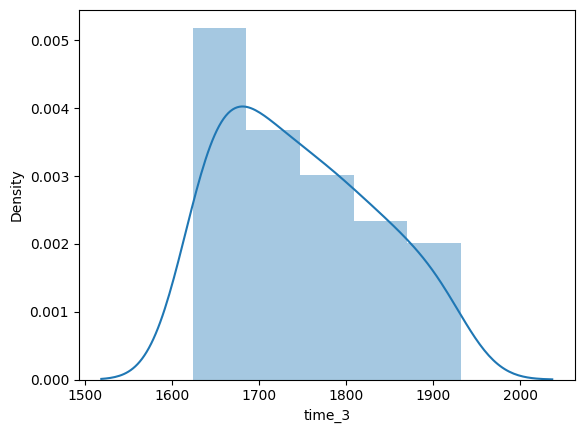

In [101]:
sns.distplot(result_df_3['time_3'])

<Axes: xlabel='time_3', ylabel='Density'>

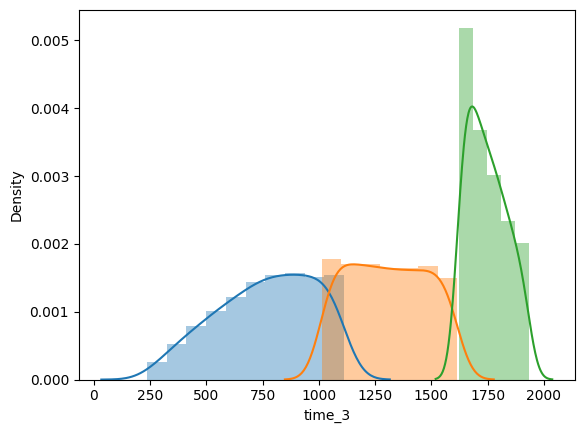

In [102]:
sns.distplot(result_df_1['time'])
sns.distplot(result_df_2['time_2'])
sns.distplot(result_df_3['time_3'])

In [103]:
result_df_1.columns,result_df_2.columns,result_df_3.columns

(Index(['Row', 'Col', 'time'], dtype='object'),
 Index(['Row_2', 'Col_2', 'time_2'], dtype='object'),
 Index(['Row_3', 'Col_3', 'time_3'], dtype='object'))

In [104]:
result_df_1['Rank'] = 1
result_df_2['Rank'] = 2
result_df_3['Rank'] = 3

In [107]:
result_df_1_output = result_df_1.copy()
result_df_1_output

Row  Col  time  Rank
0      0  445   236     1
1      1  446   251     1
2      2  447   266     1
3      3  448   281     1
4      4    0   294     1
..   ...  ...   ...   ...
343  343  580  1104     1
344  344  386  1106     1
345  345  301  1108     1
346  346  216  1110     1
347  347  734  1112     1

[348 rows x 4 columns]

In [112]:
result_df_2_output = result_df_2.copy()
result_df_2_output.columns = result_df_2_output.columns.str.replace('_2','')
result_df_2_output

Row  Col  time  Rank
0      0  324  1012     2
1      1    0  1014     2
2      2   39  1015     2
3      3  247  1016     2
4      4  282  1017     2
..   ...  ...   ...   ...
343  343  173  1611     2
344  344  319  1612     2
345  345  364  1612     2
346  346  123  1613     2
347  347   38  1614     2

[348 rows x 4 columns]

In [113]:
result_df_3_output = result_df_3.copy()
result_df_3_output.columns = result_df_3_output.columns.str.replace('_3','')
result_df_3_output

Row  Col  time  Rank
0     0   34  1624     3
1     1    0  1625     3
2     2   79  1625     3
3     3   19  1626     3
4     4   53  1627     3
..  ...  ...   ...   ...
92   92   52  1904     3
93   93   97  1915     3
94   94   75  1917     3
95   95   98  1930     3
96   96   76  1932     3

[97 rows x 4 columns]

In [114]:
concatenated_df = pd.concat([result_df_1_output, result_df_2_output, result_df_3_output])
concatenated_df

Row  Col  time  Rank
0     0  445   236     1
1     1  446   251     1
2     2  447   266     1
3     3  448   281     1
4     4    0   294     1
..  ...  ...   ...   ...
92   92   52  1904     3
93   93   97  1915     3
94   94   75  1917     3
95   95   98  1930     3
96   96   76  1932     3

[793 rows x 4 columns]

<Axes: xlabel='Rank', ylabel='time'>

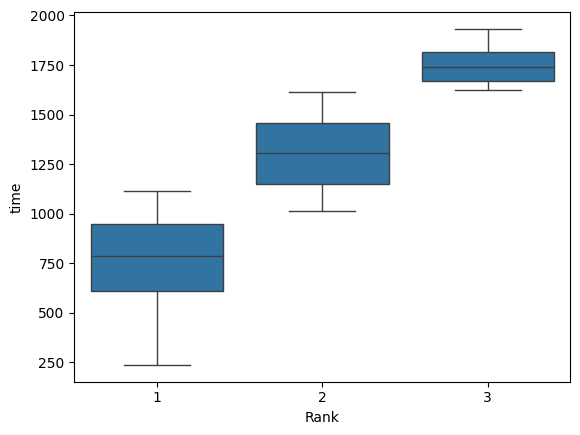

In [116]:
sns.boxplot(data=concatenated_df, x="Rank", y="time")